In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.drop('Id',inplace=True,axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [7]:
print(df.isna().sum().to_string())

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [8]:
numerical_columns=[]
categorical_columns=[]
for i in df.columns:
    if df[i].dtypes not in ['0','object']:
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

# Data visualization

In [9]:
#NumericalData

Text(0.5, 1.0, 'Box Plot ')

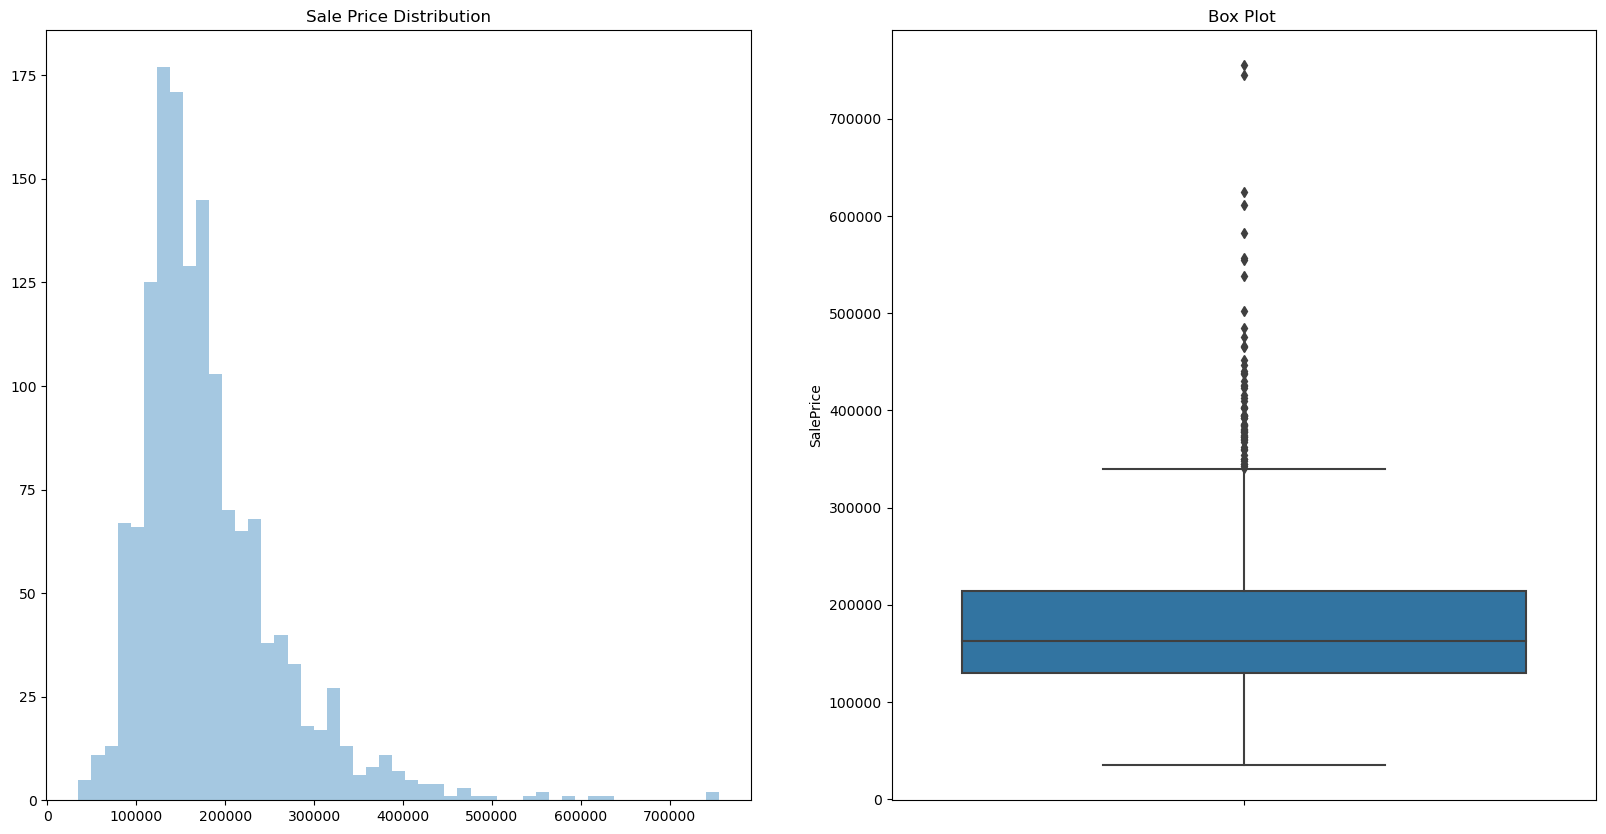

In [10]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(x=df['SalePrice'],kde=False)
plt.title('Sale Price Distribution')

plt.subplot(1,2,2)
sns.boxplot(y='SalePrice',data=df)
plt.title('Box Plot ')

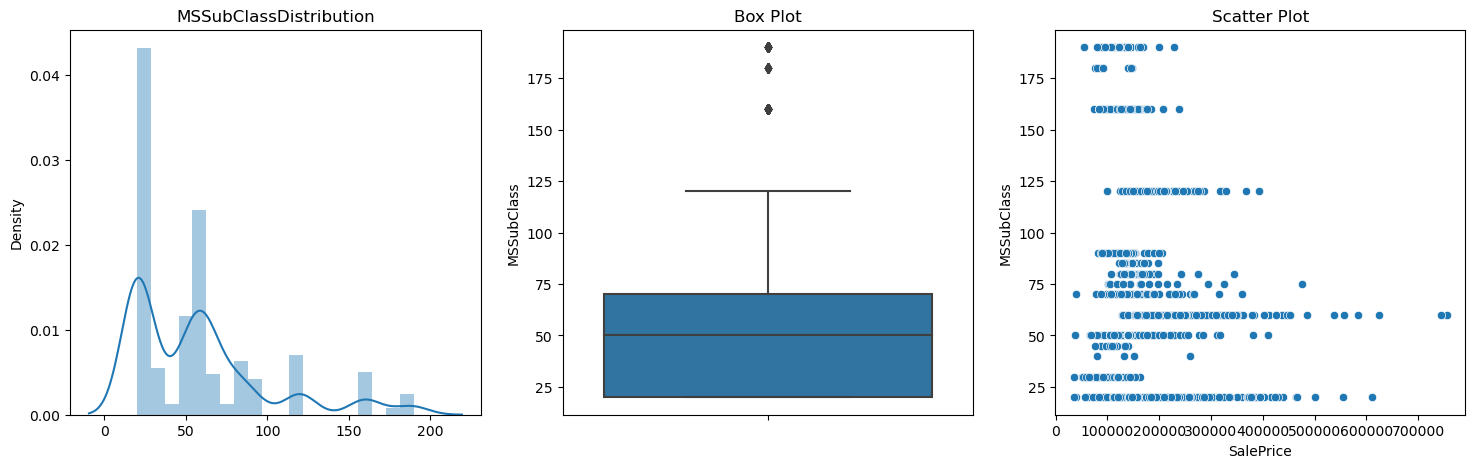

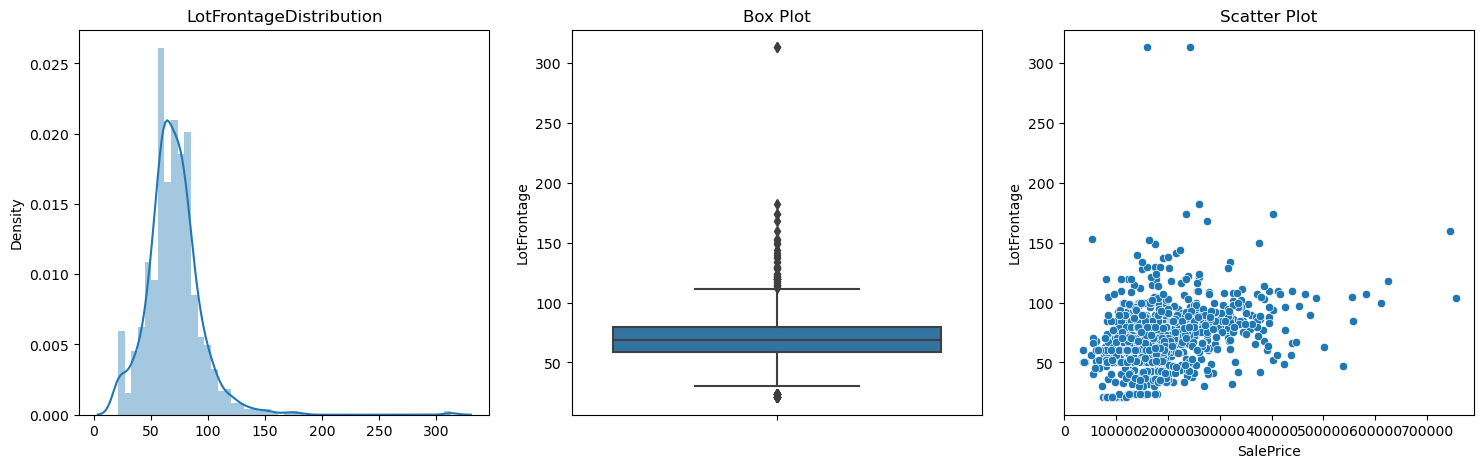

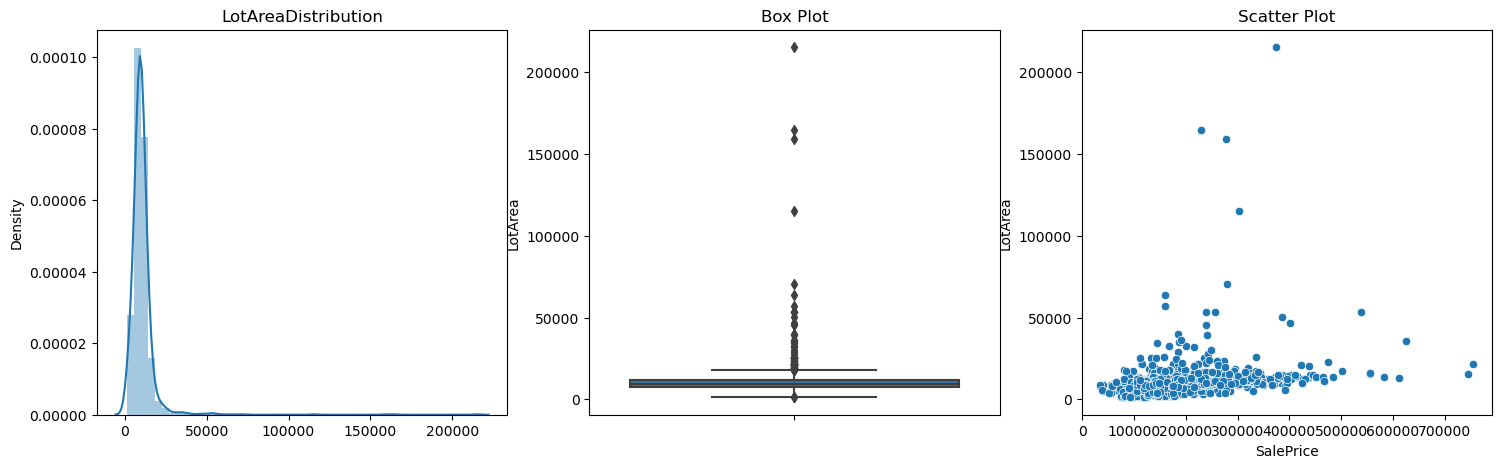

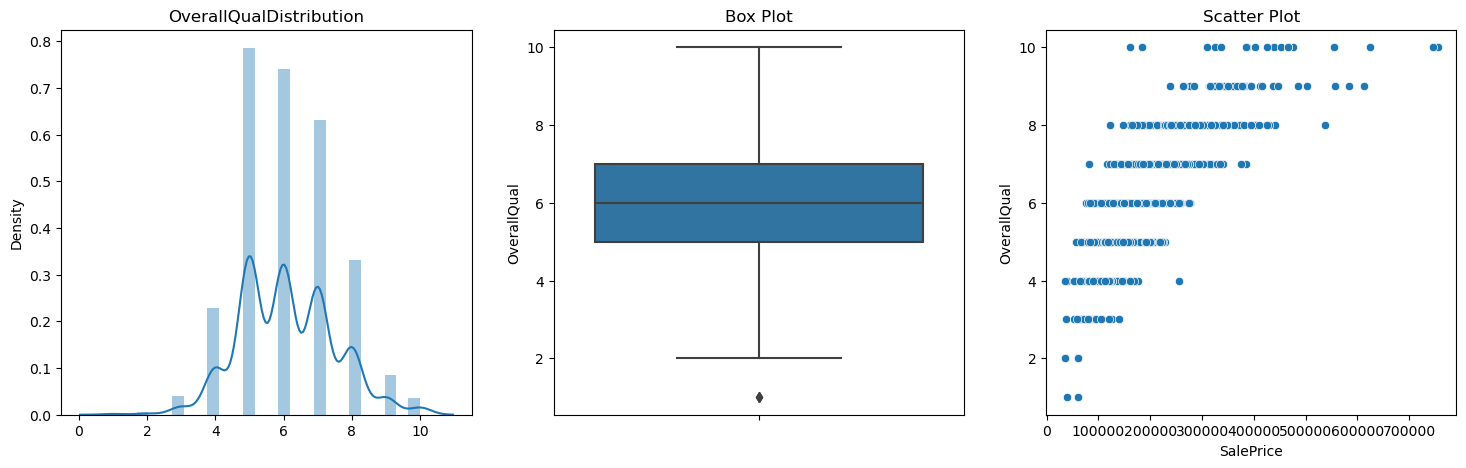

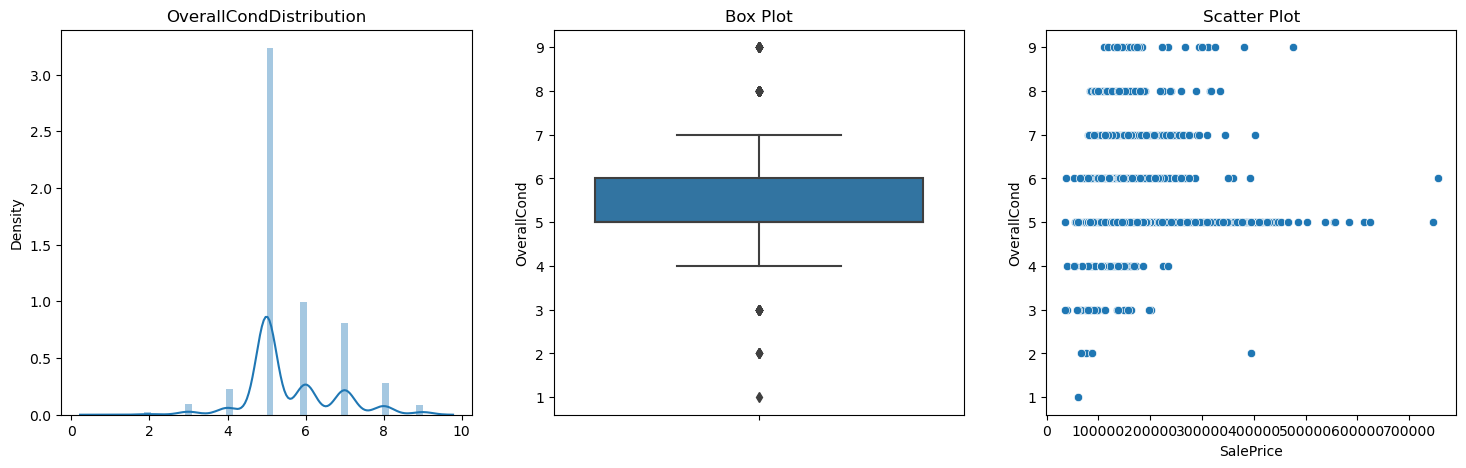

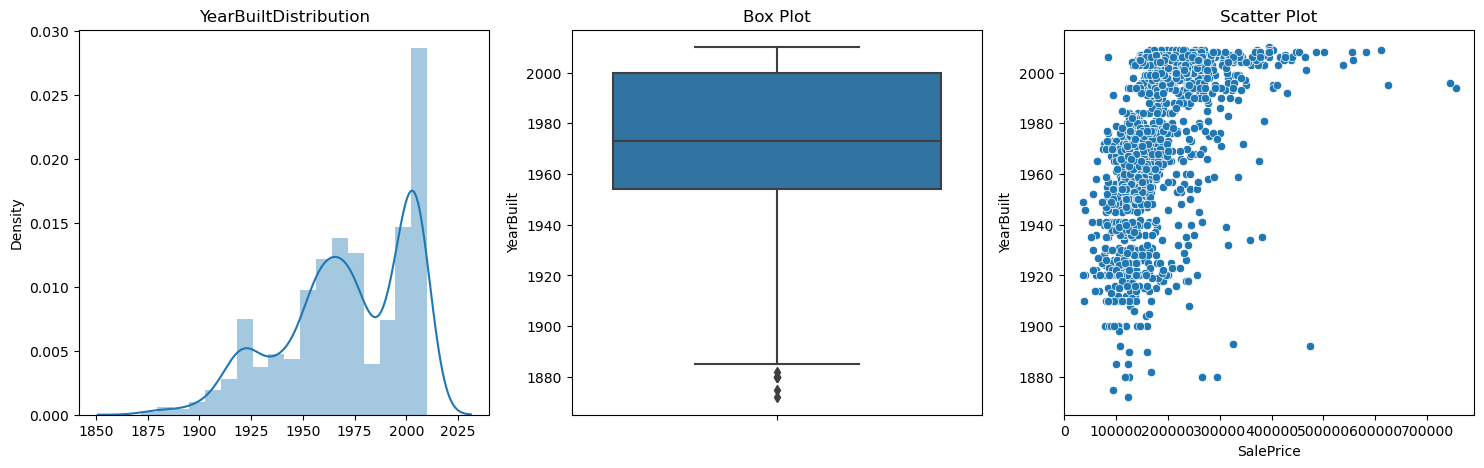

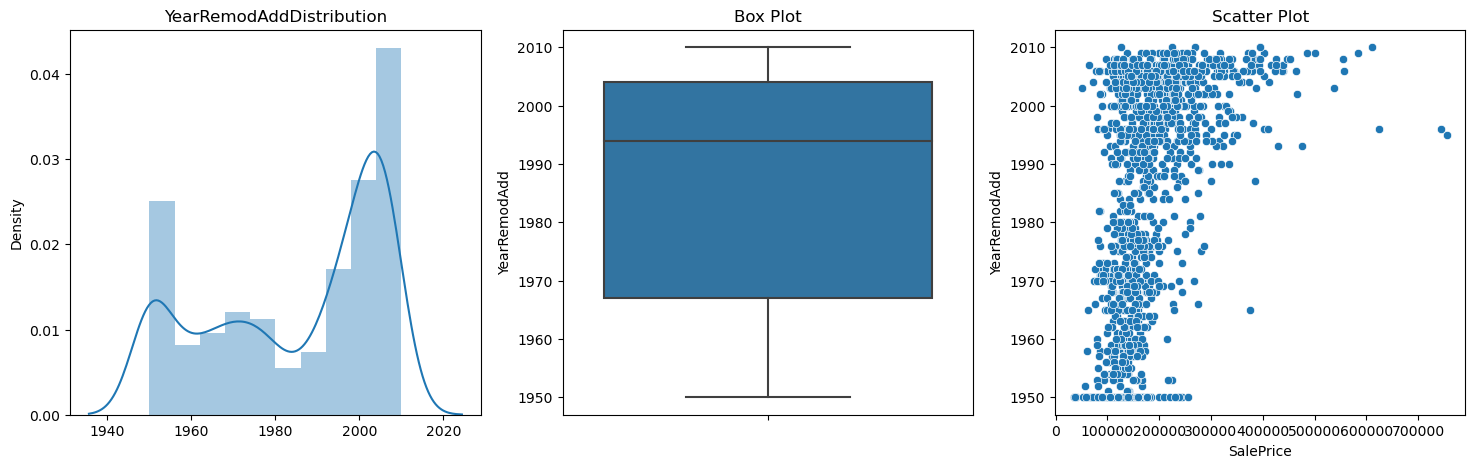

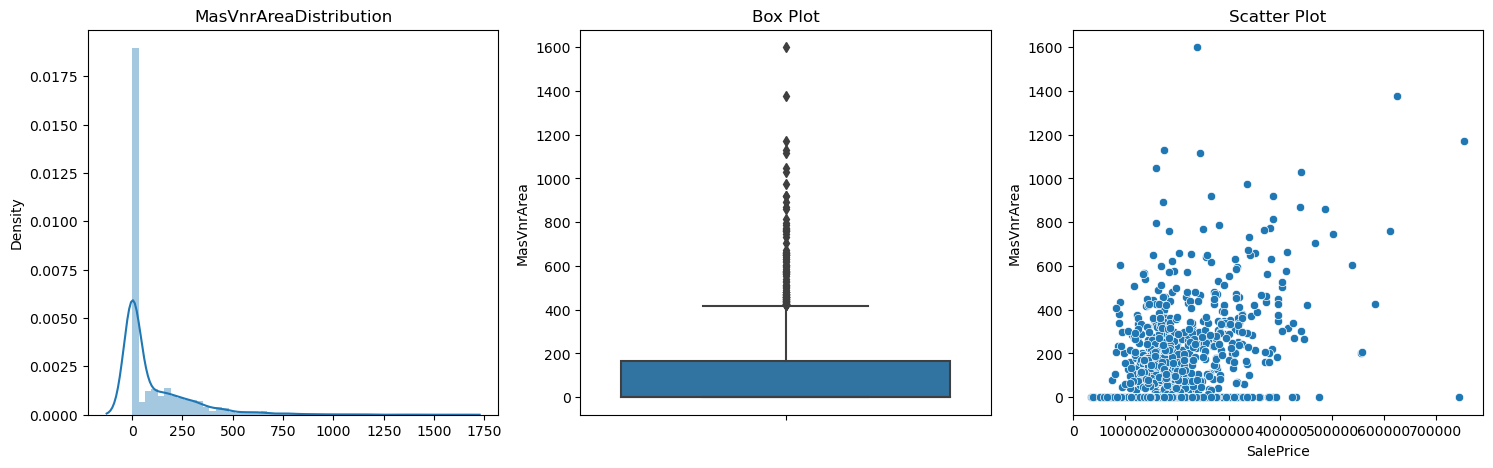

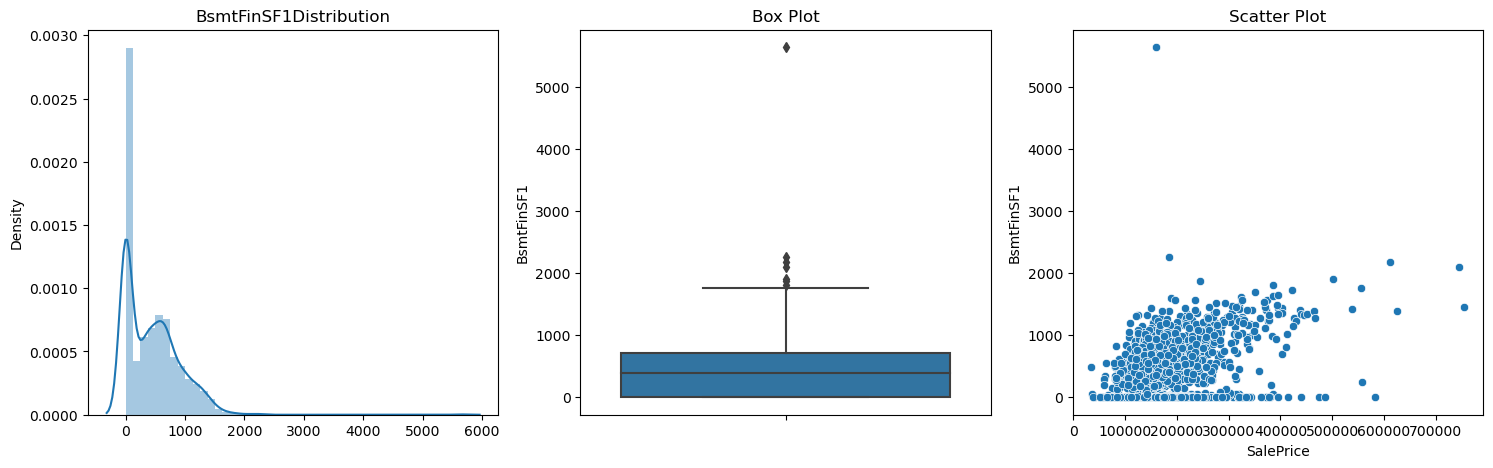

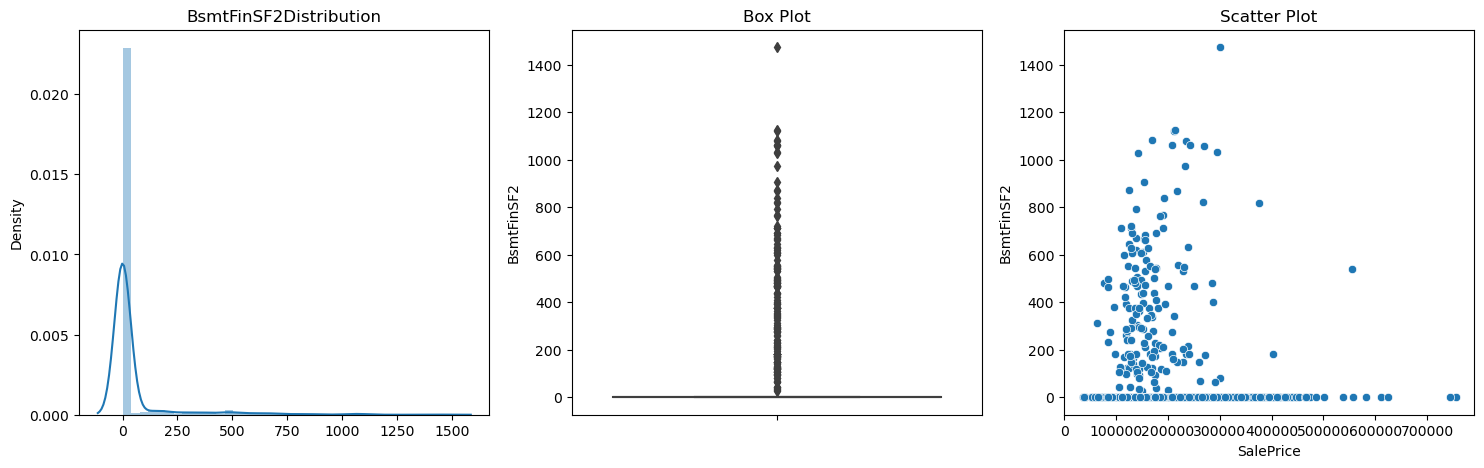

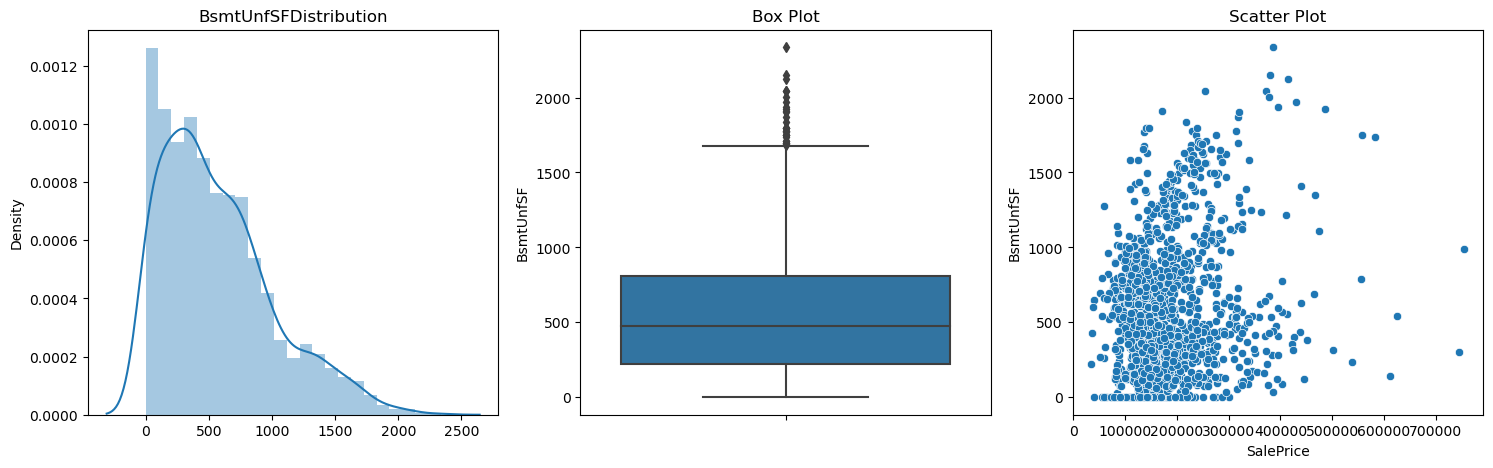

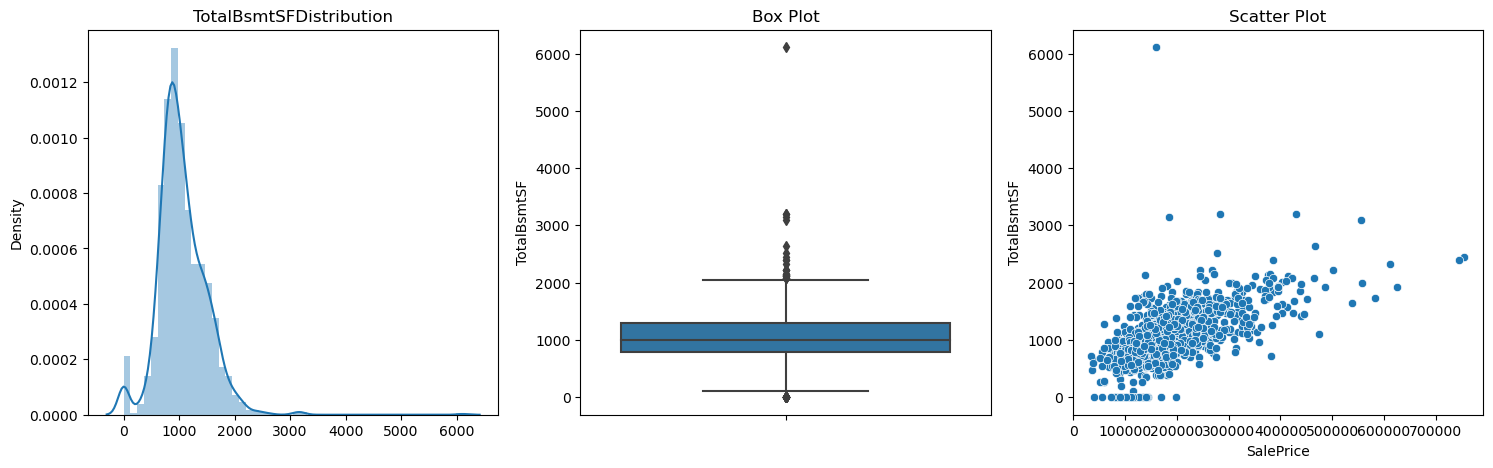

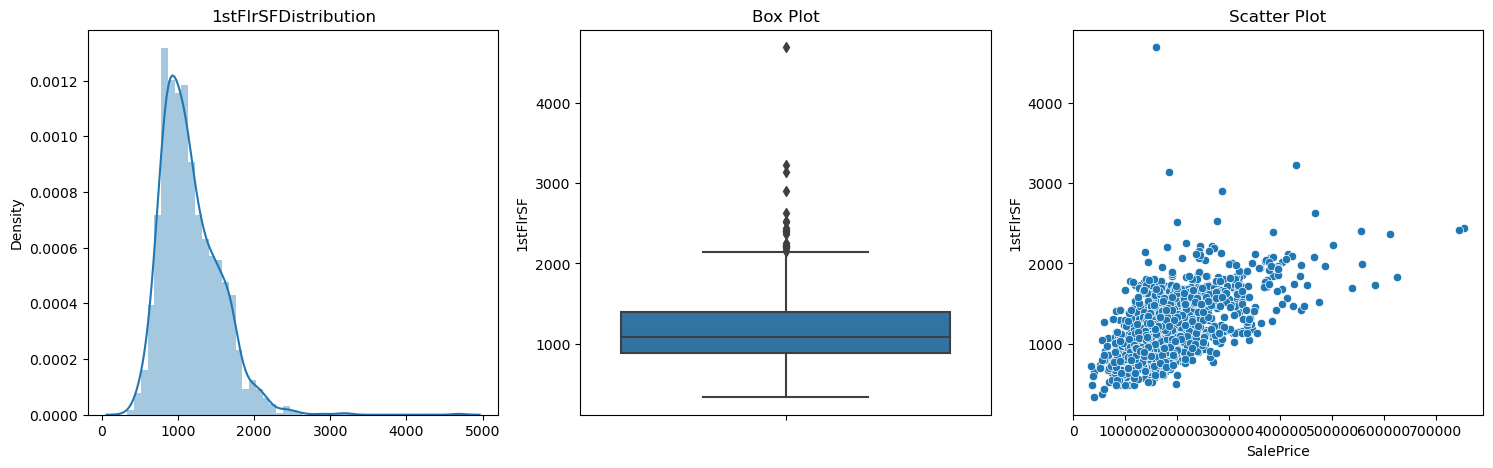

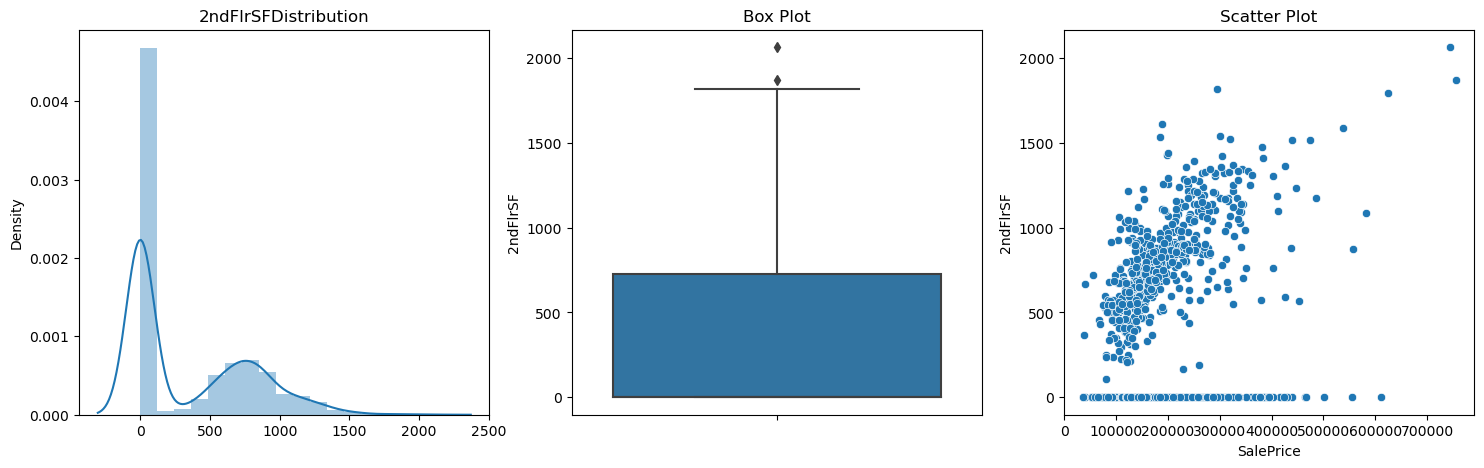

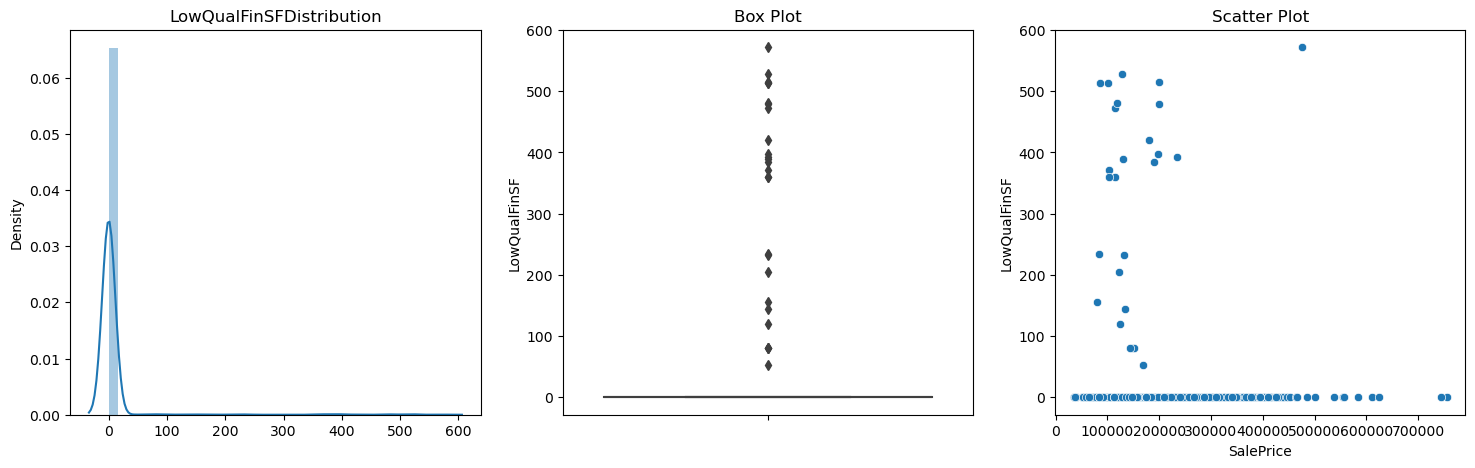

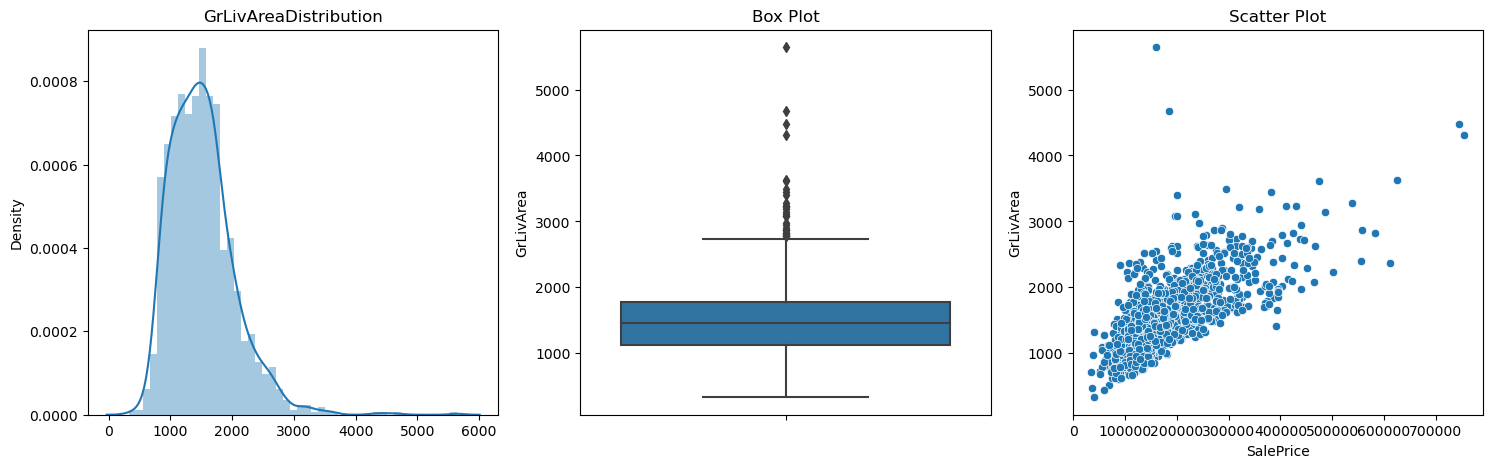

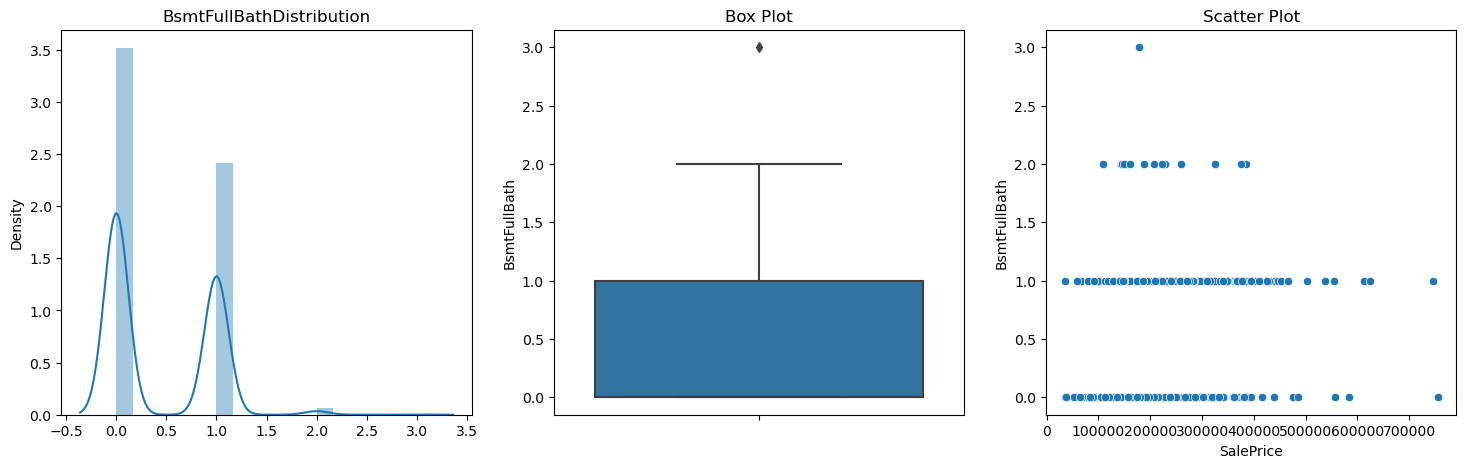

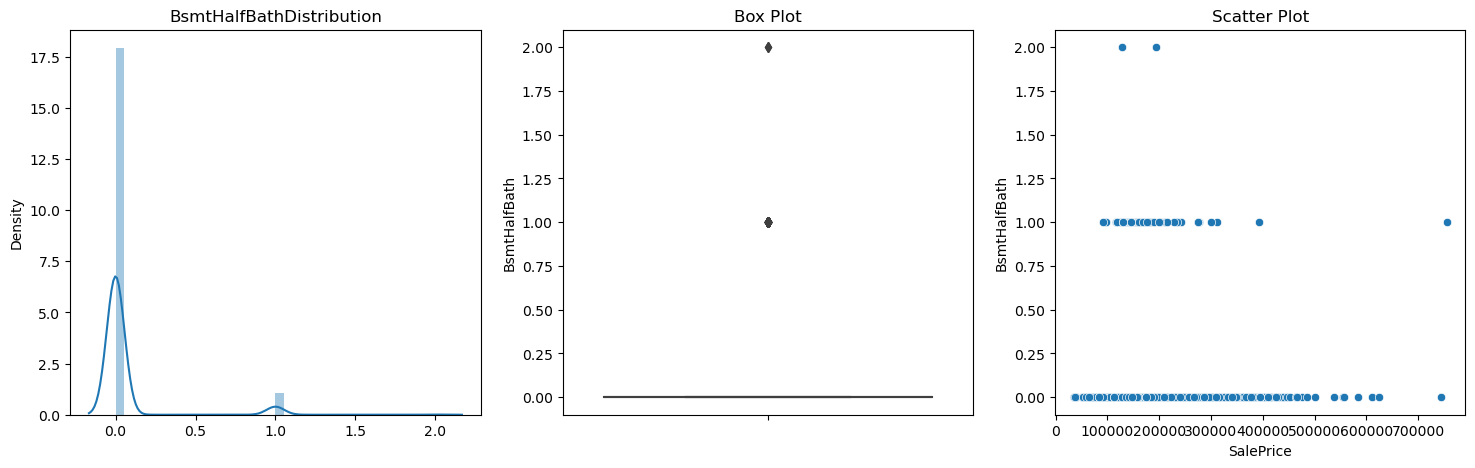

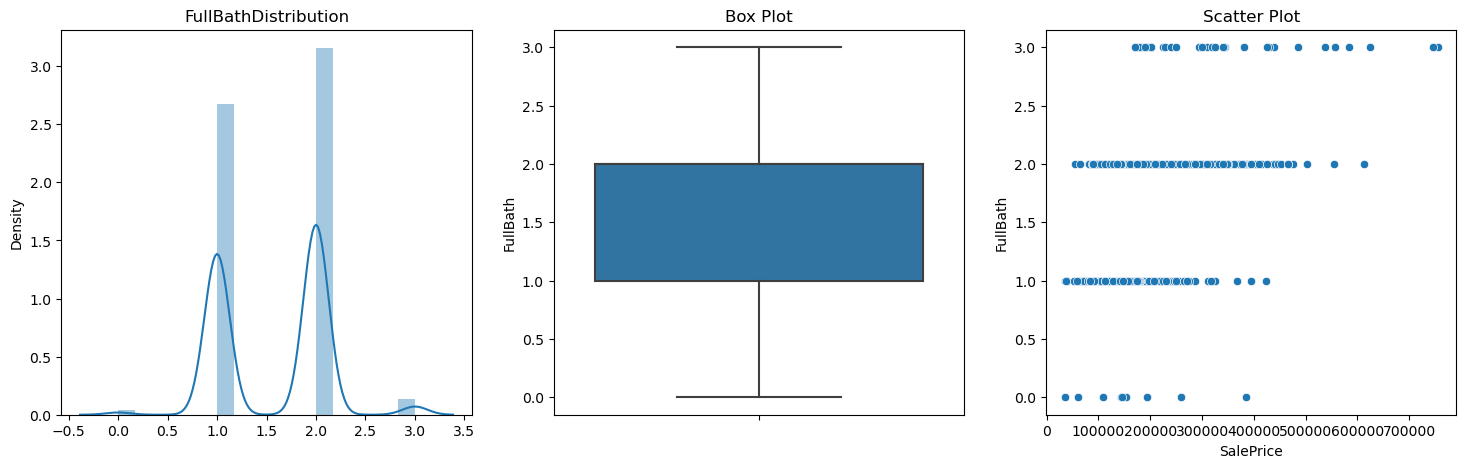

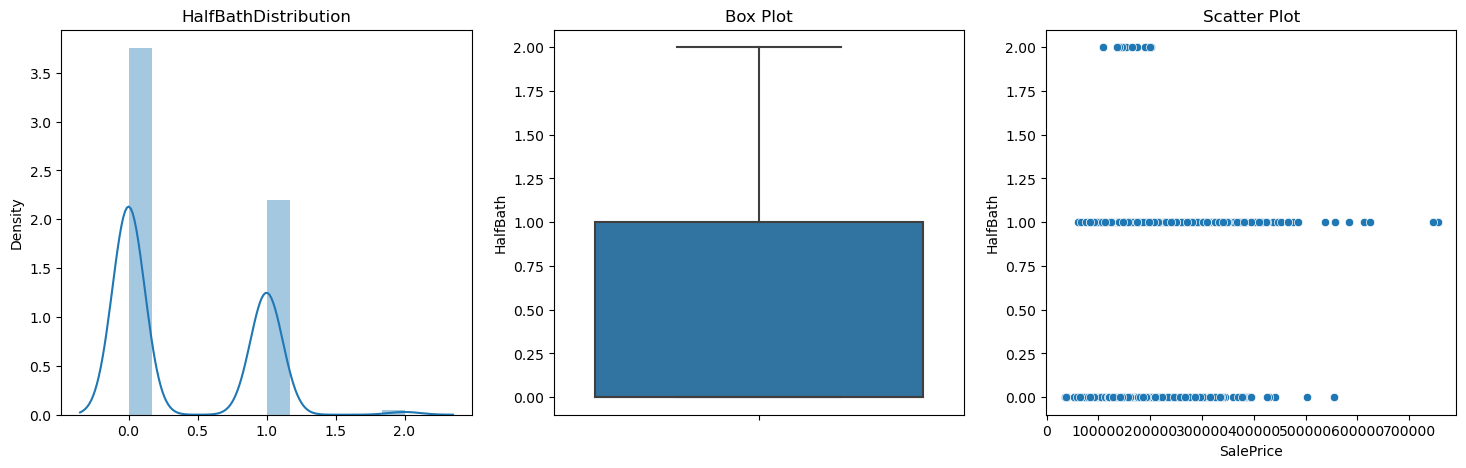

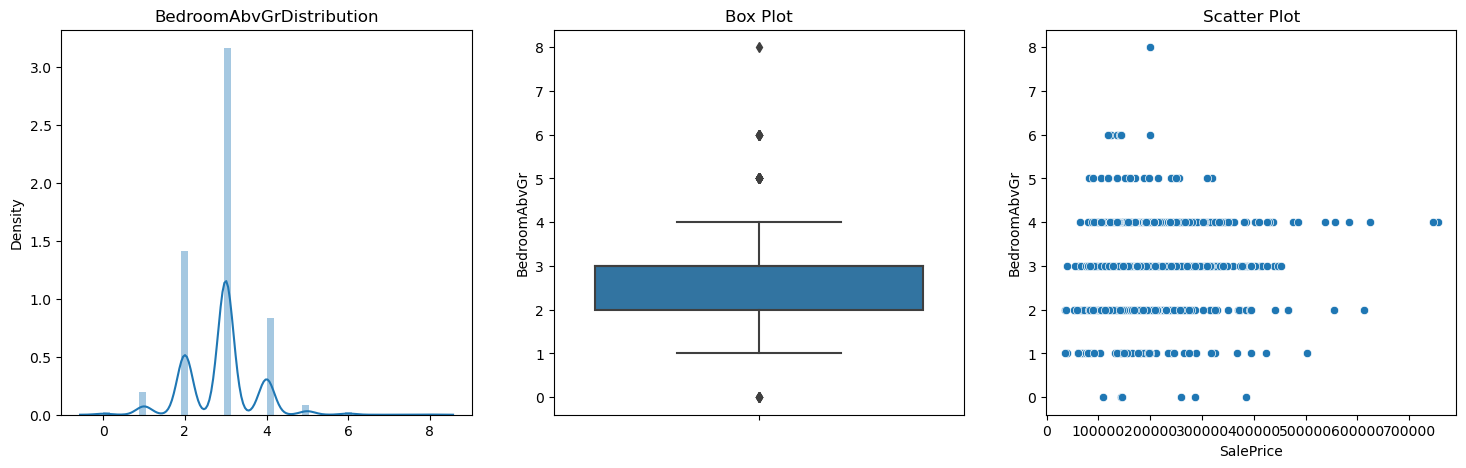

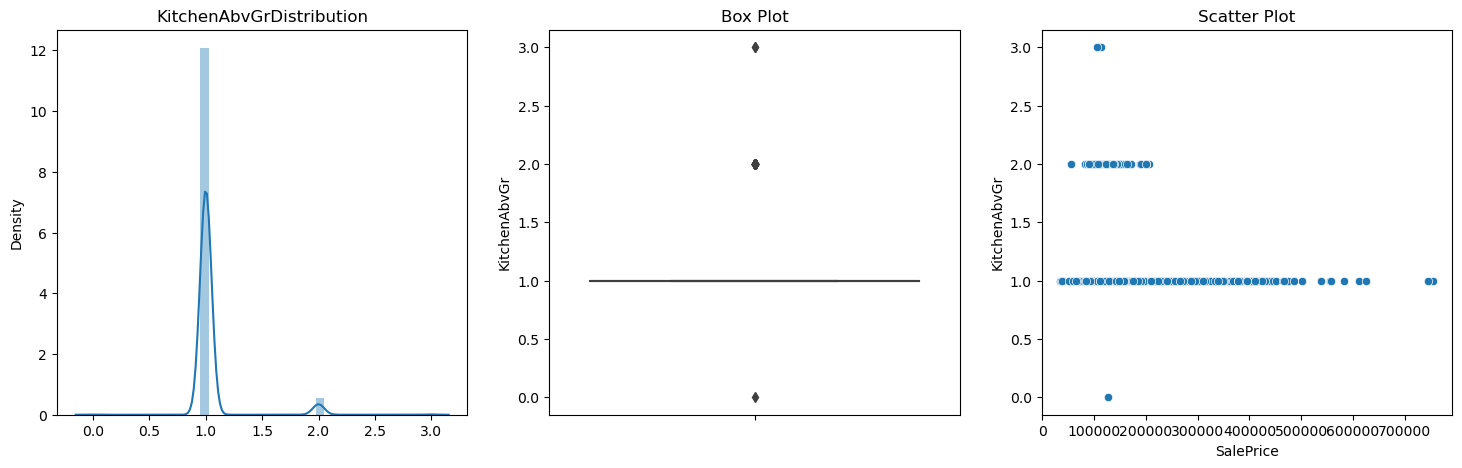

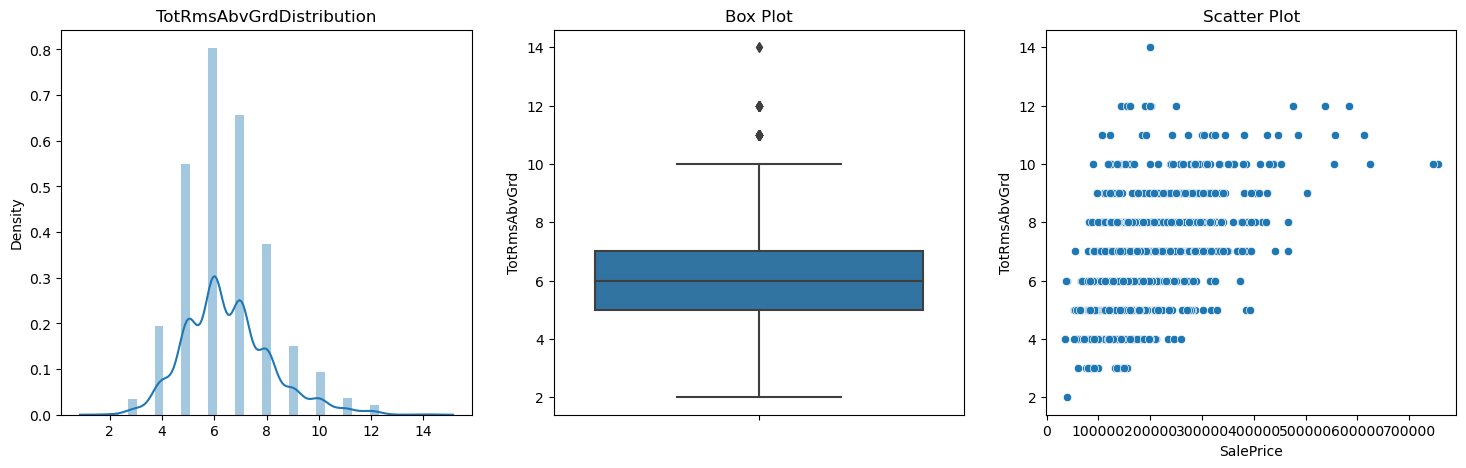

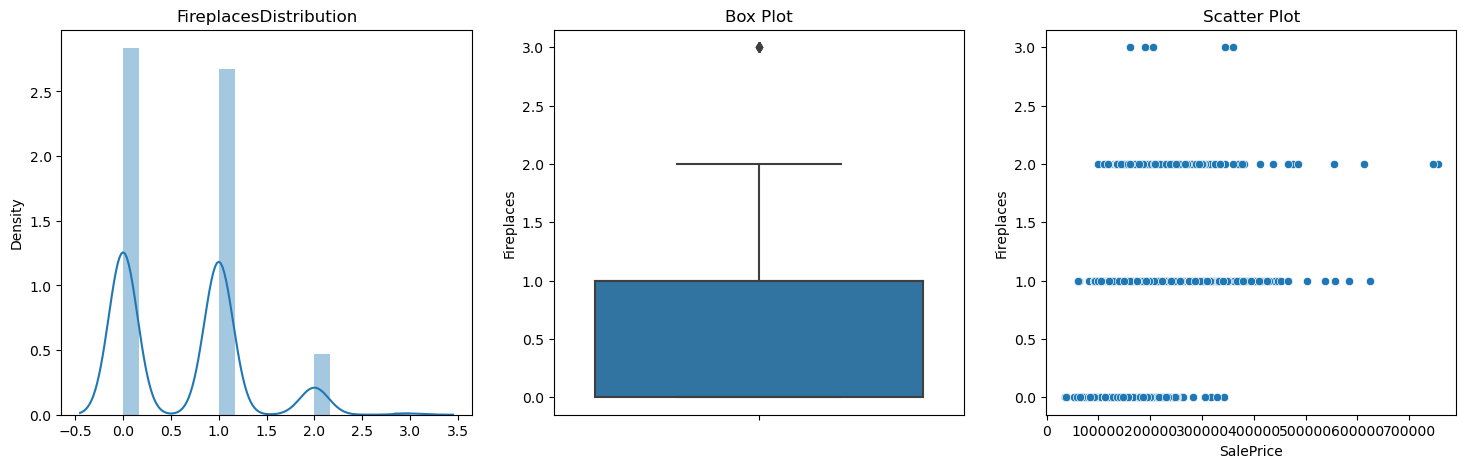

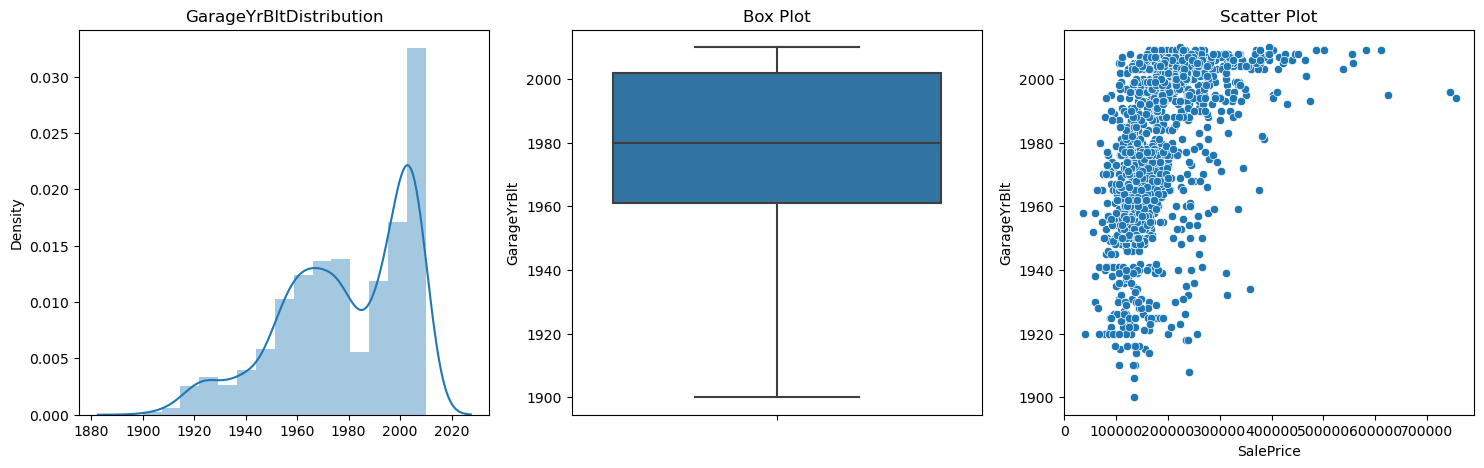

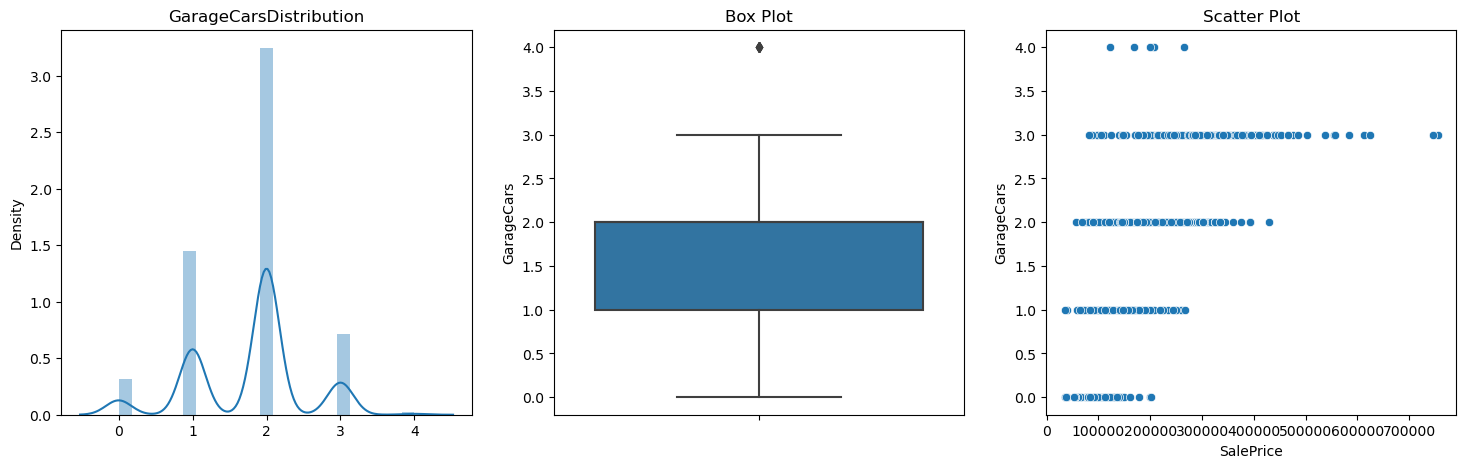

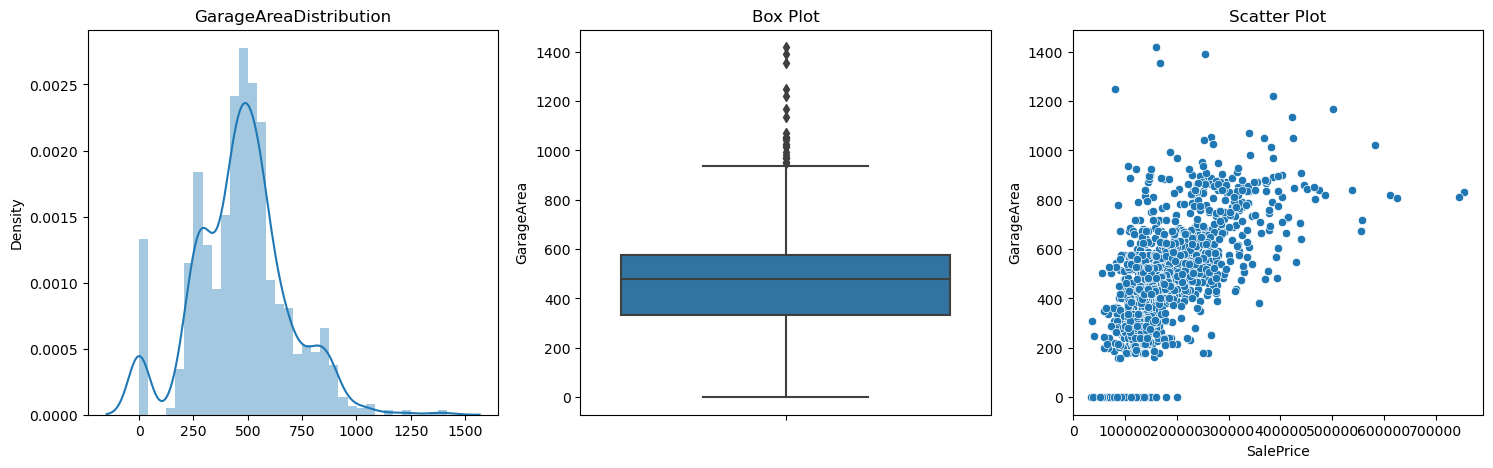

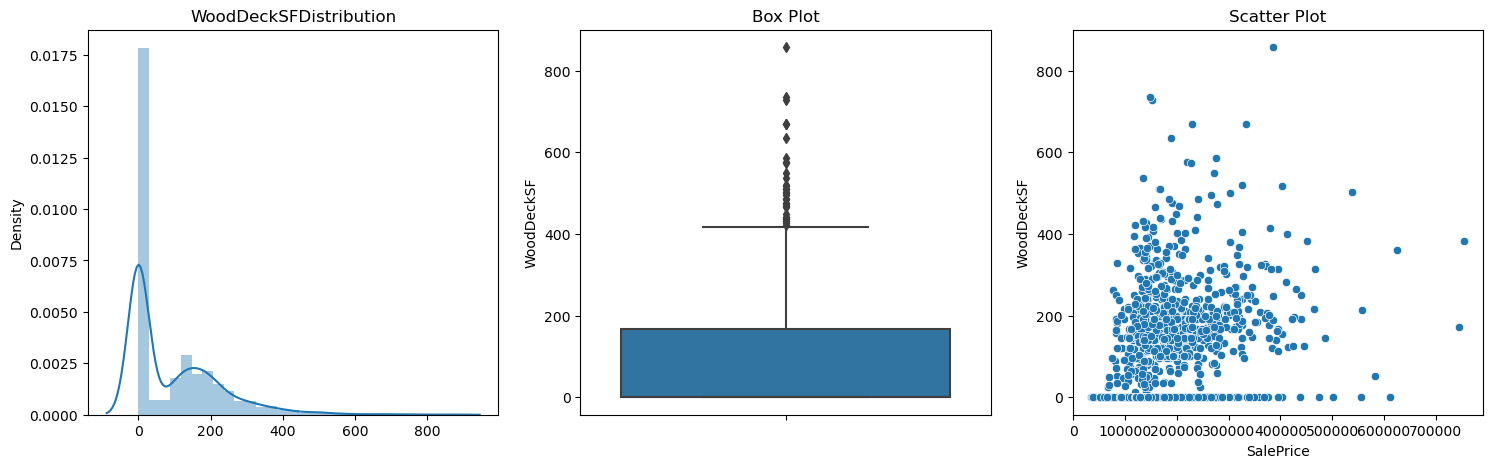

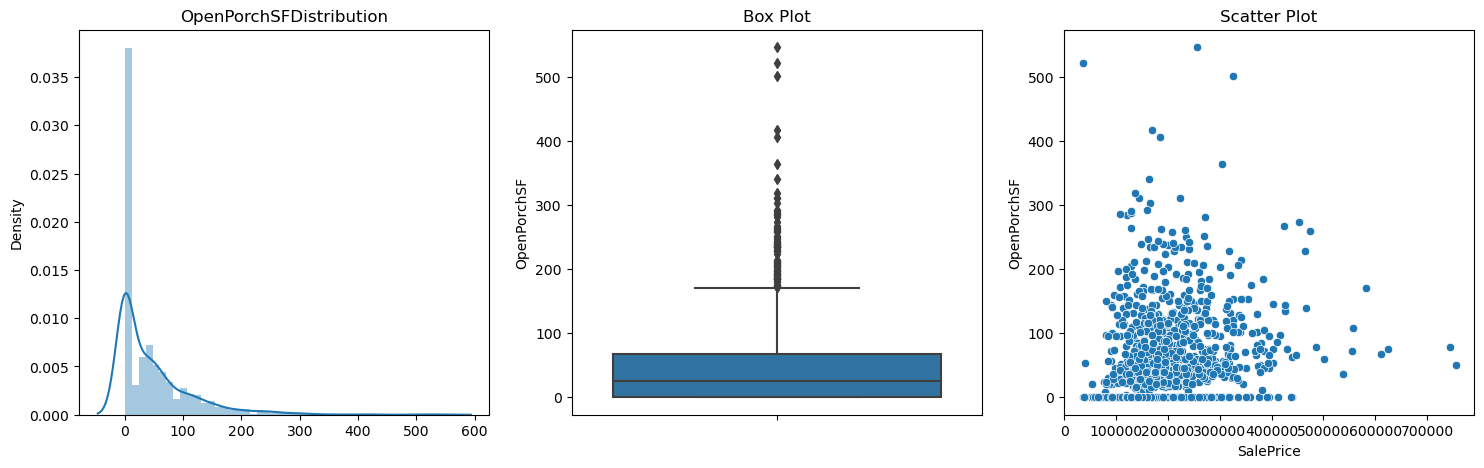

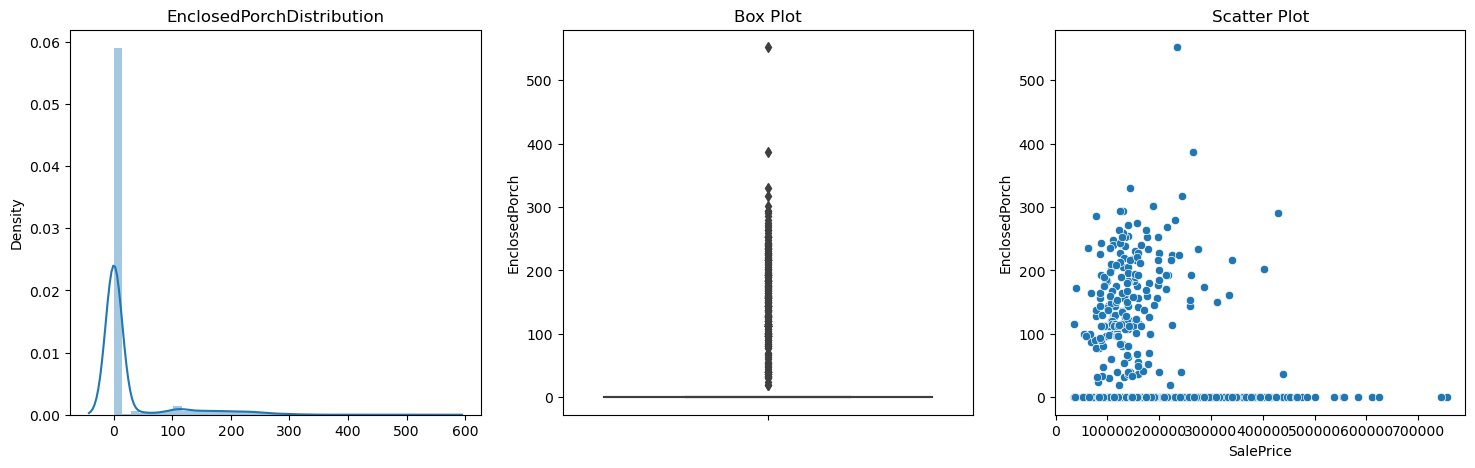

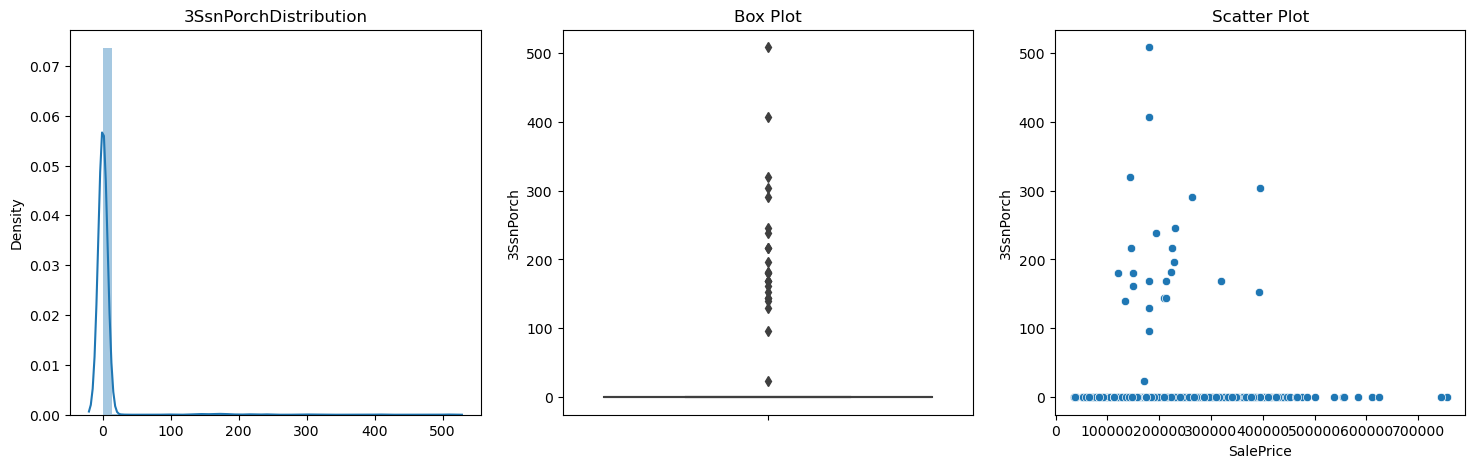

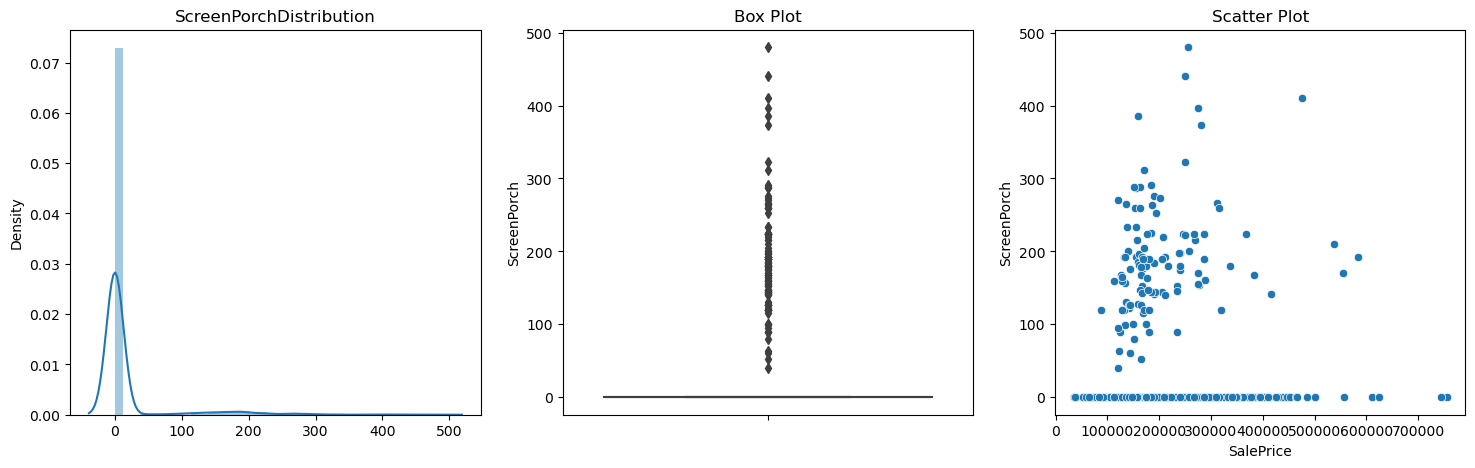

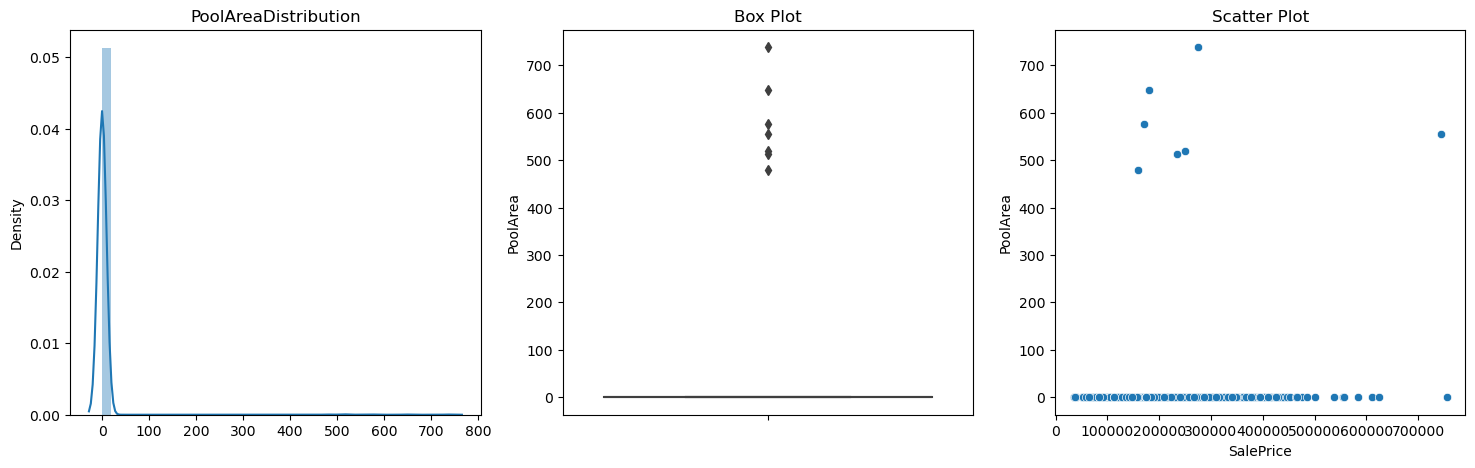

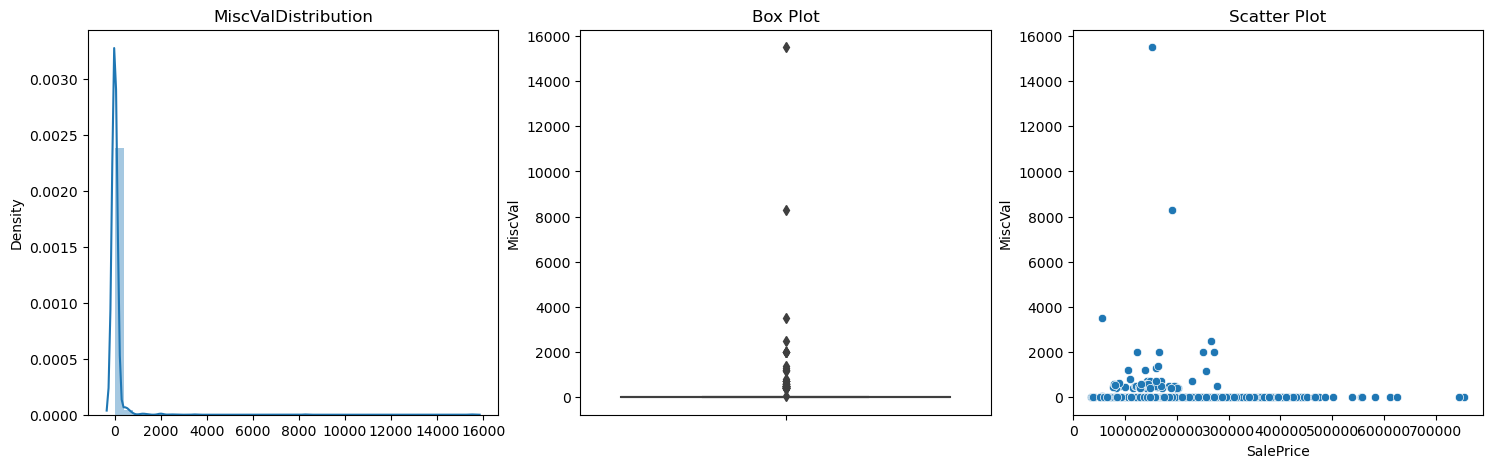

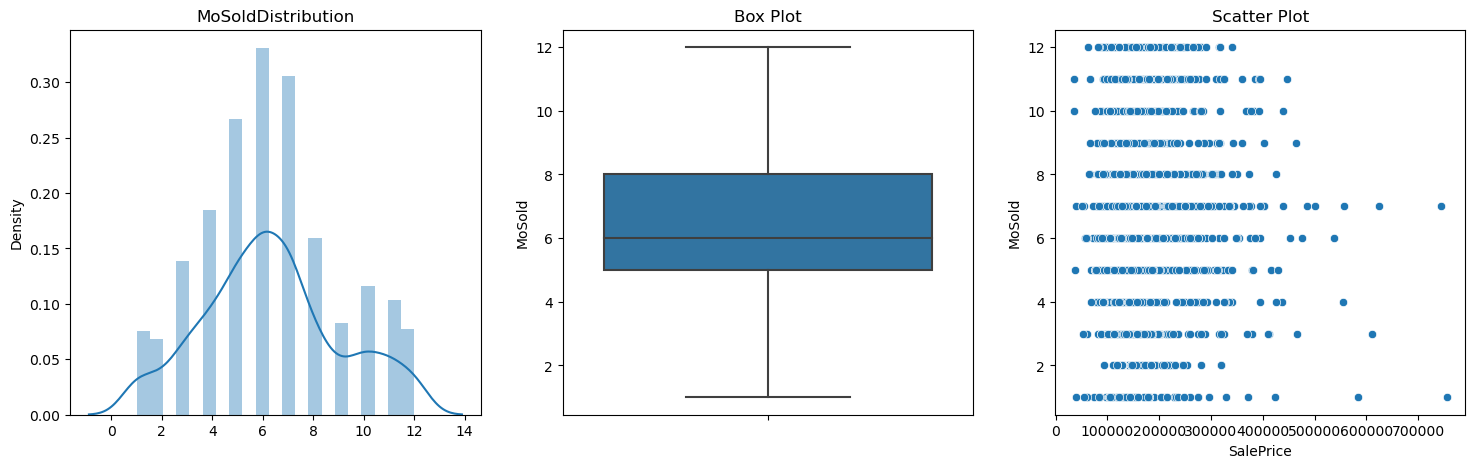

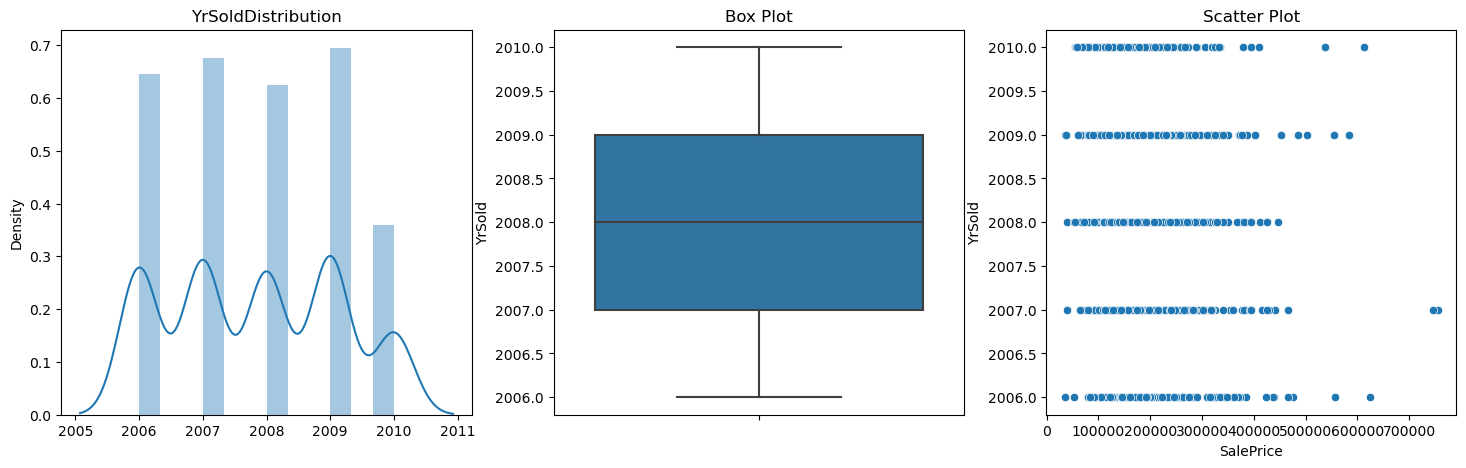

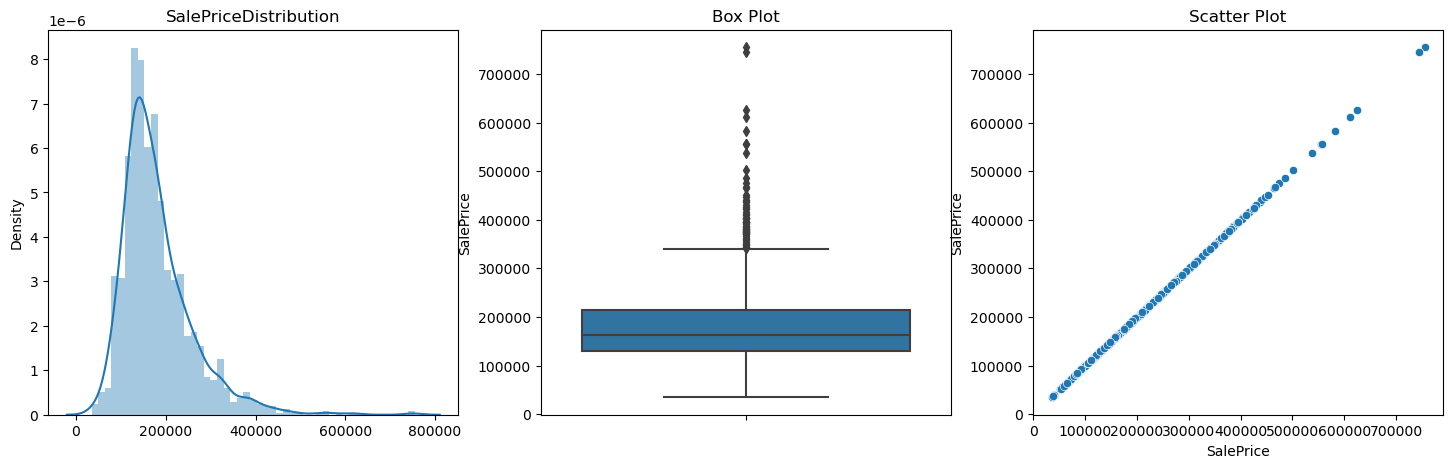

In [11]:

for i in numerical_columns:
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    sns.distplot(x=df[i])
    plt.title(i+'Distribution')

    plt.subplot(1,3,2)
    sns.boxplot(y=i,data=df)
    plt.title('Box Plot')
    
    plt.subplot(1,3,3)
    sns.scatterplot(y=i,x='SalePrice',data=df)
    plt.title('Scatter Plot')
    
    

<Axes: >

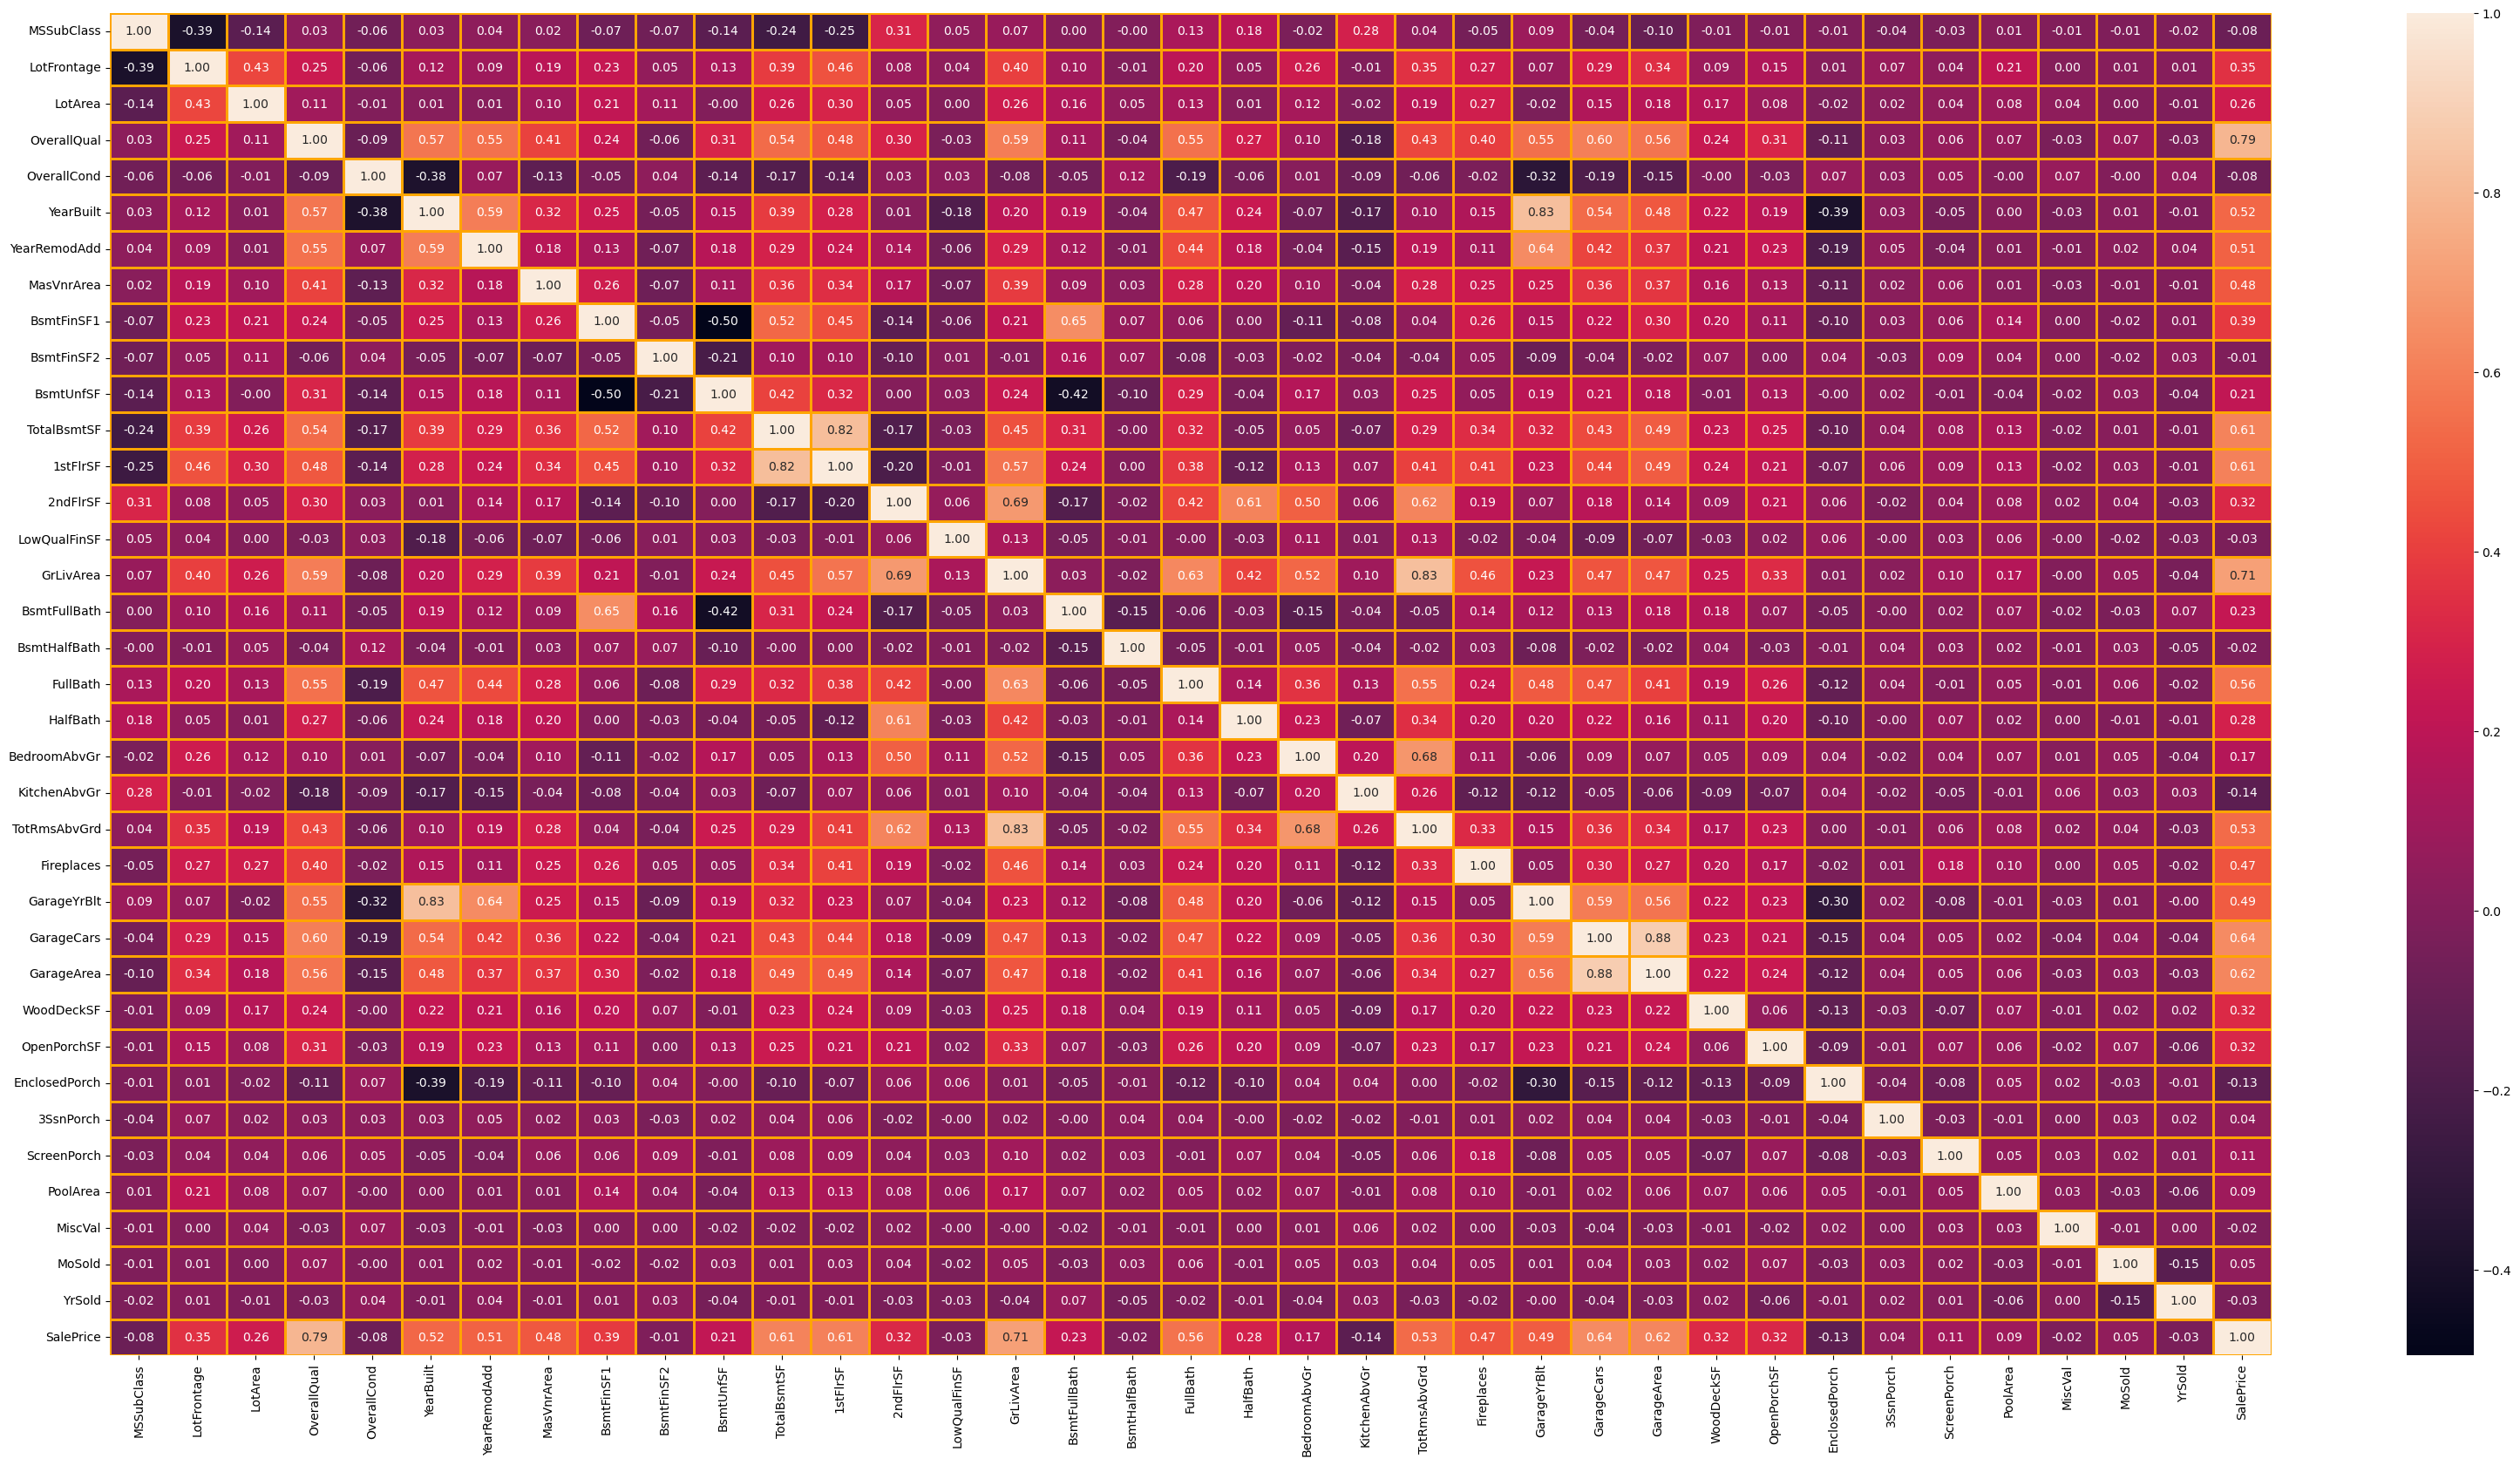

In [12]:
plt.figure(figsize=(40,20))
sns.heatmap(df[numerical_columns].corr(),annot=True,fmt='0.2f',linecolor='orange',linewidths=2)

In [13]:
df.drop('BsmtFinSF2',axis=1,inplace=True)
df.drop('LowQualFinSF',axis=1,inplace=True)
df.drop('BsmtHalfBath',axis=1,inplace=True)
df.drop('YrSold',axis=1,inplace=True)
df.drop('MiscVal',axis=1,inplace=True)


In [14]:
for i in ['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','YrSold','MiscVal']:
    numerical_columns.remove(i)

In [15]:
#CategoricalData

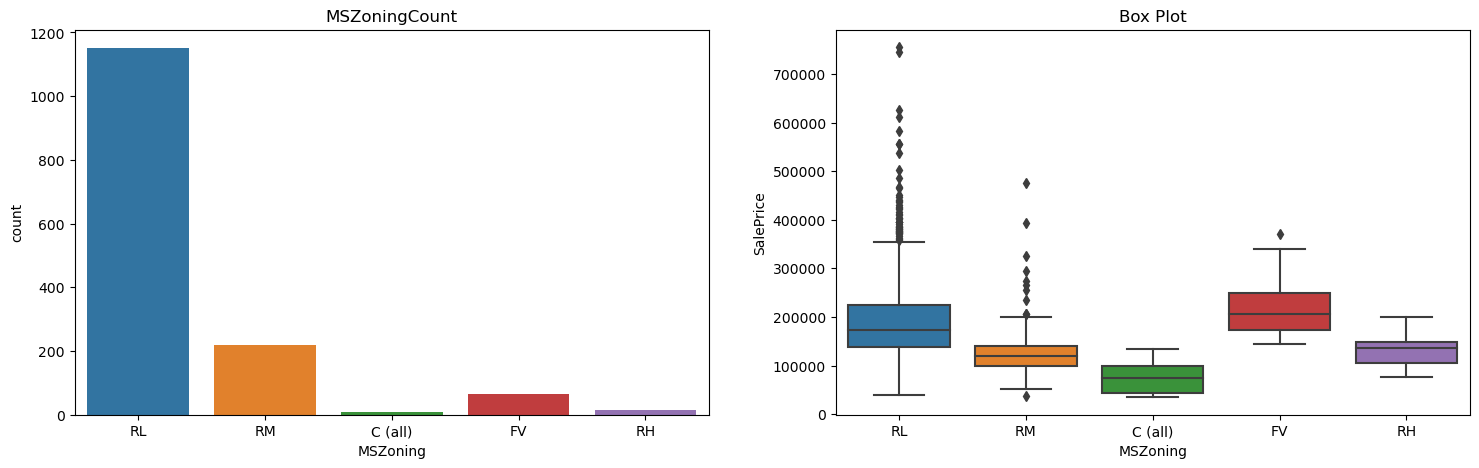

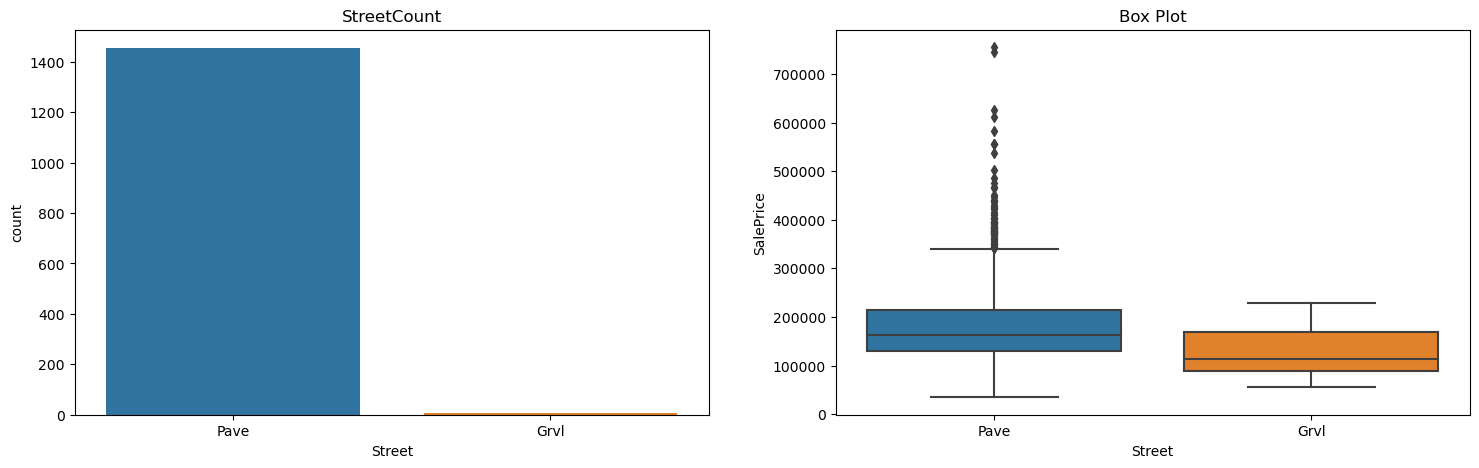

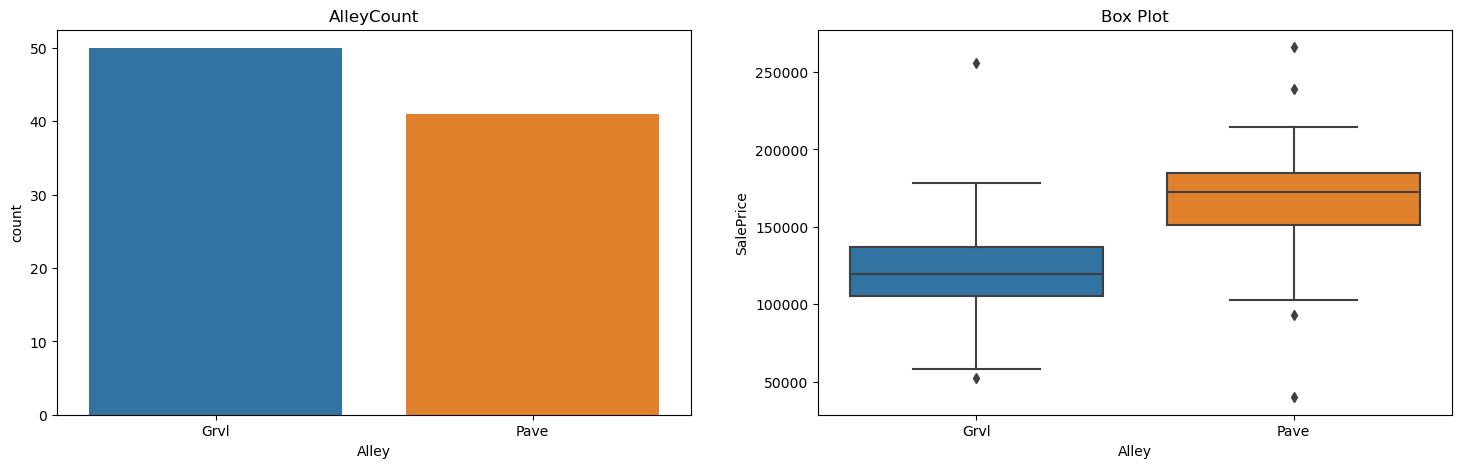

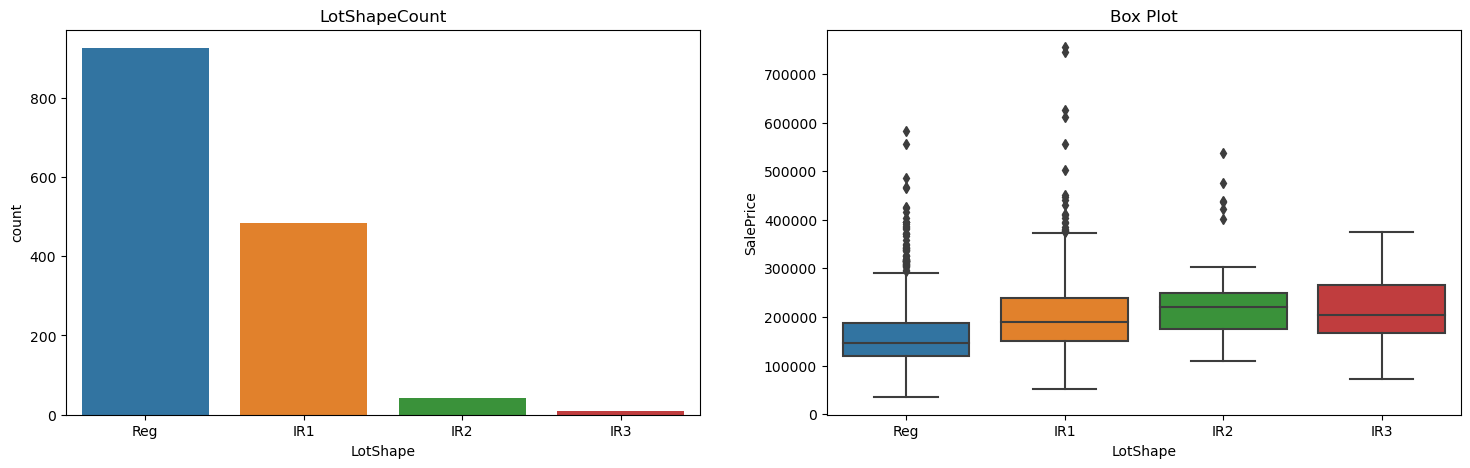

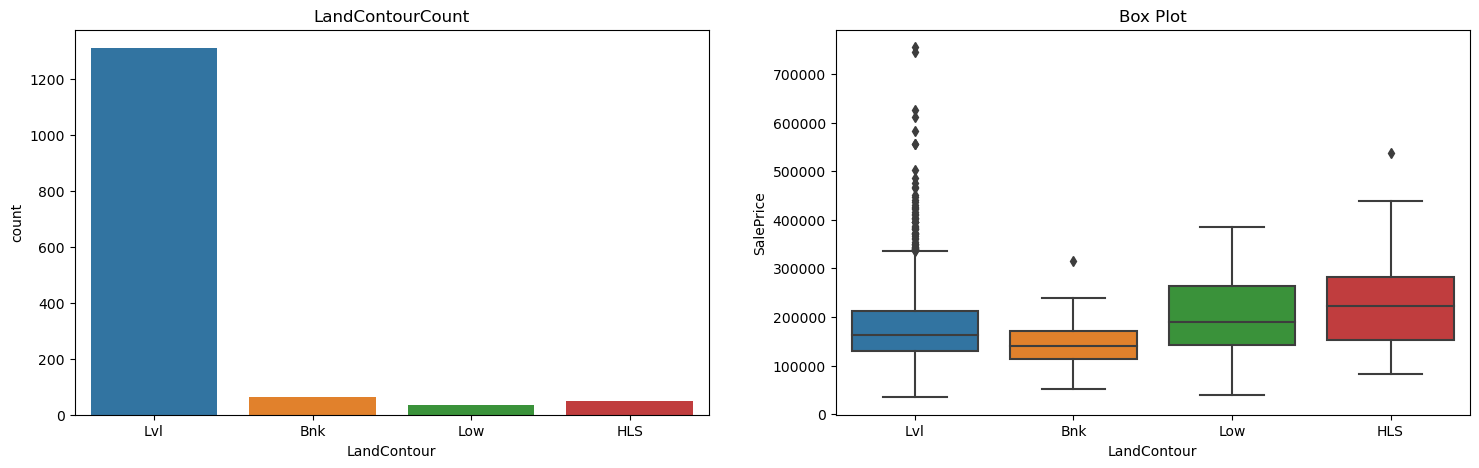

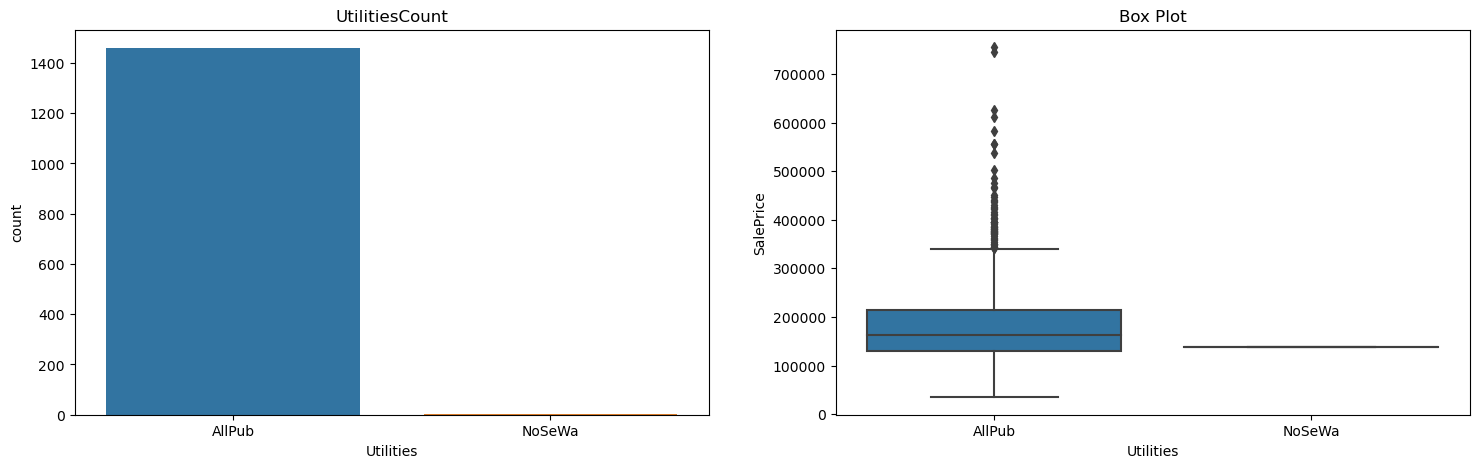

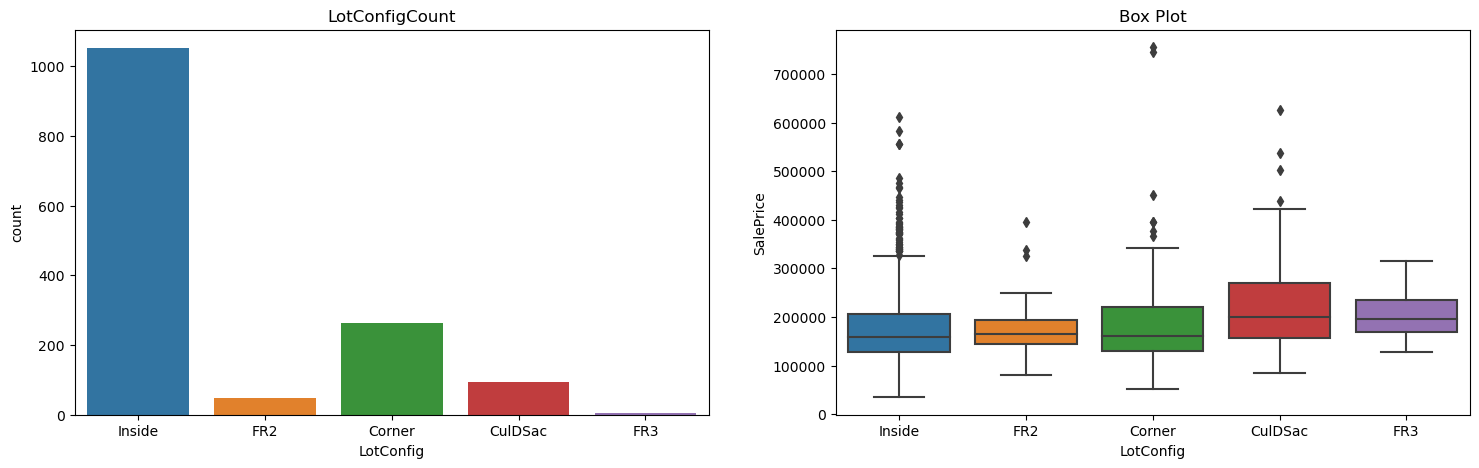

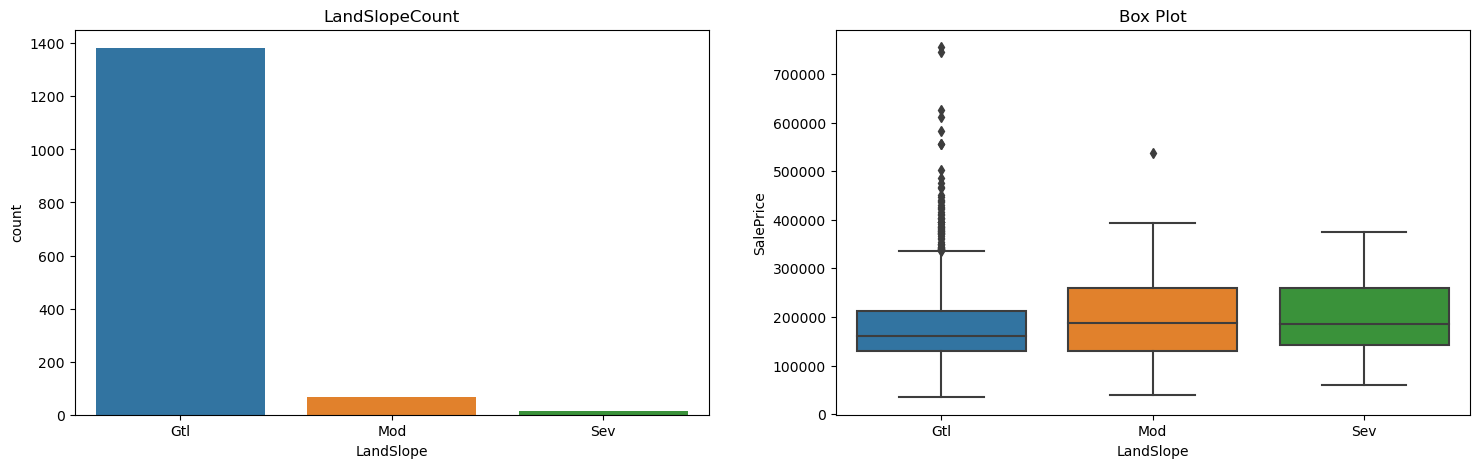

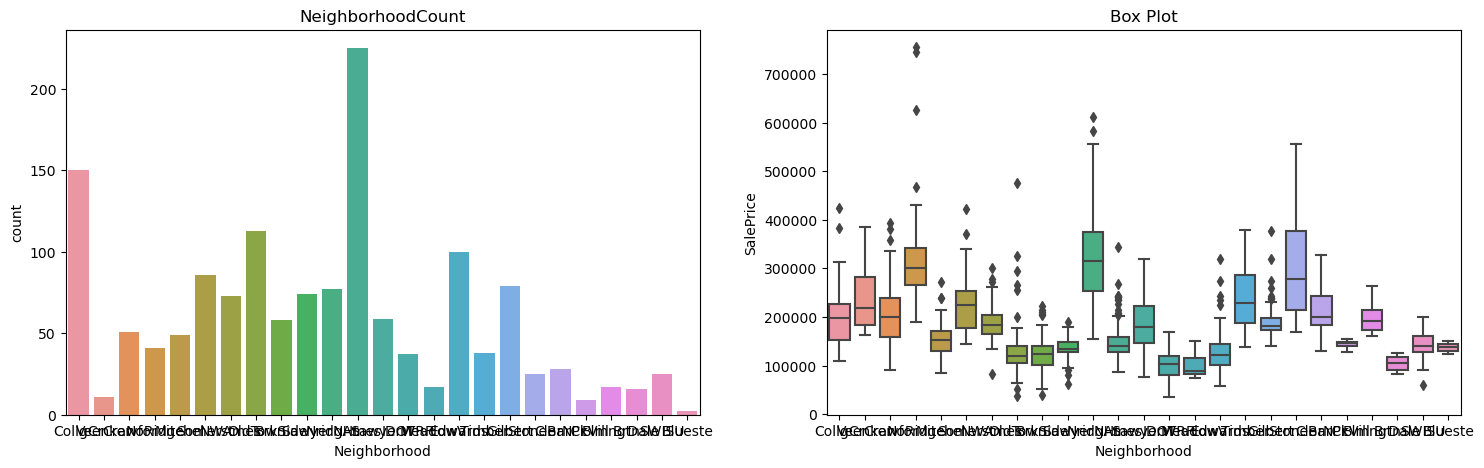

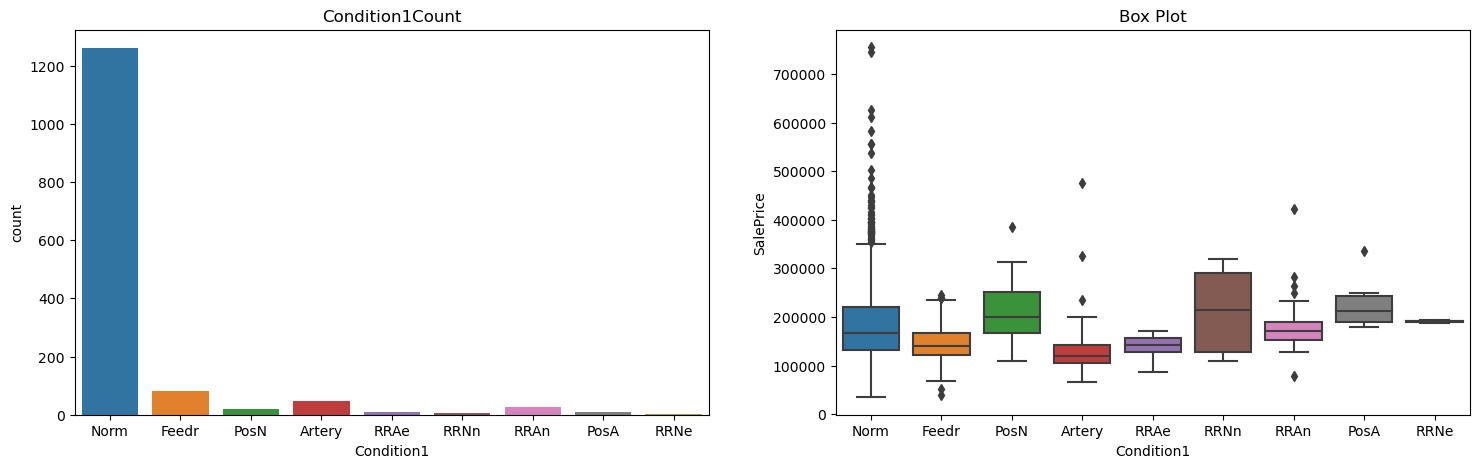

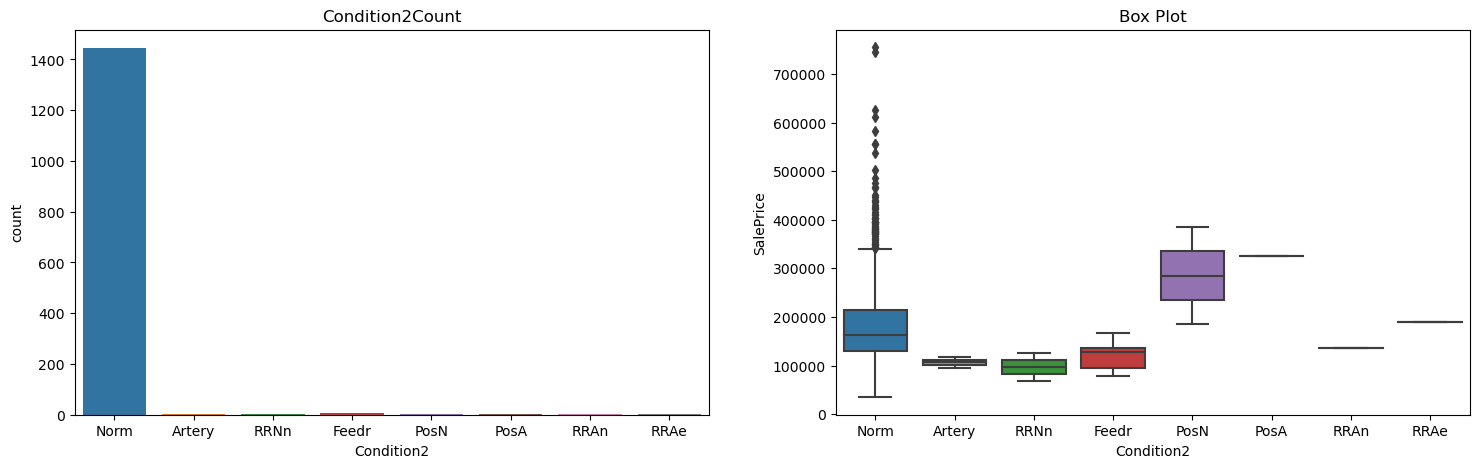

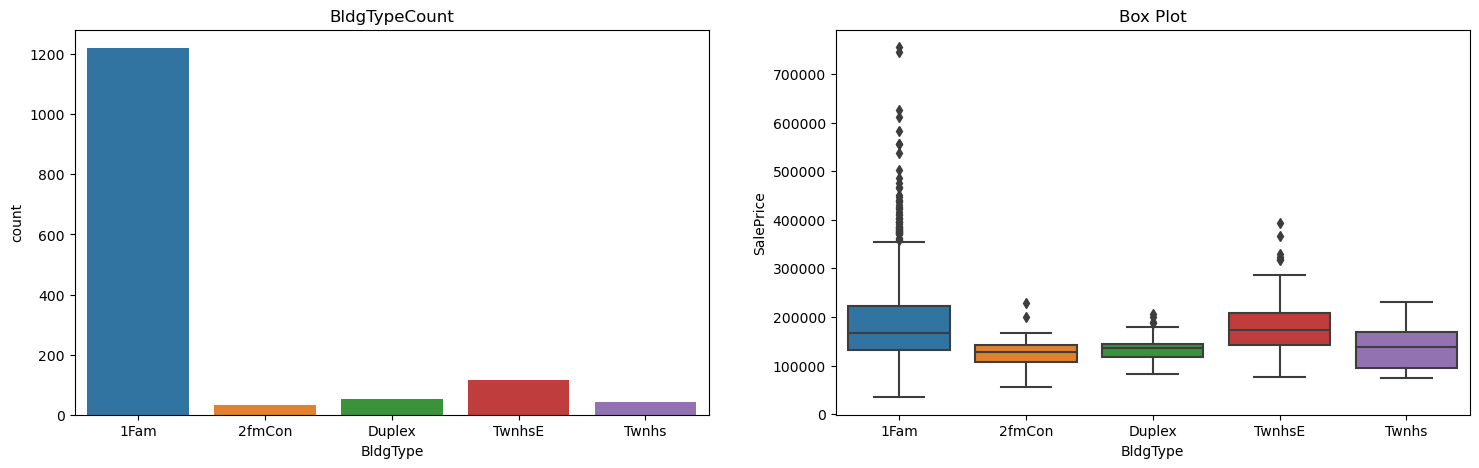

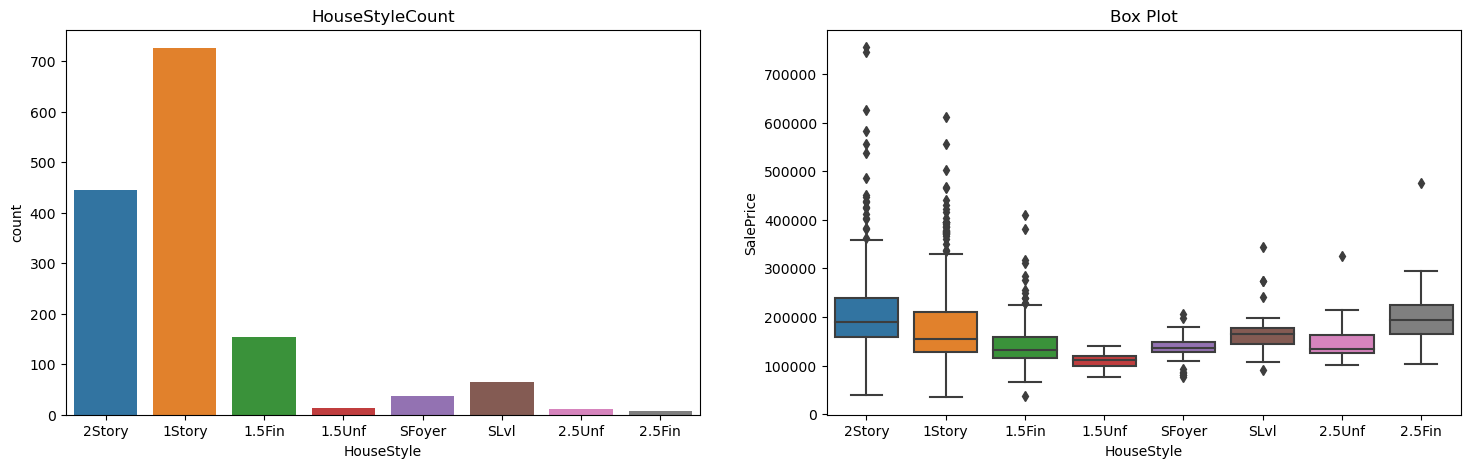

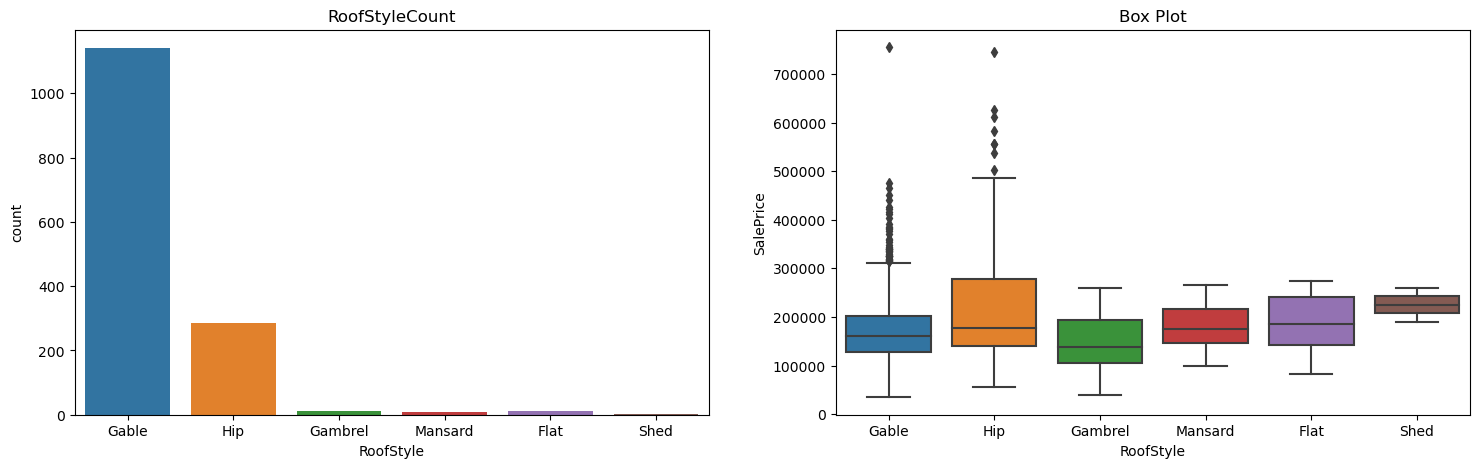

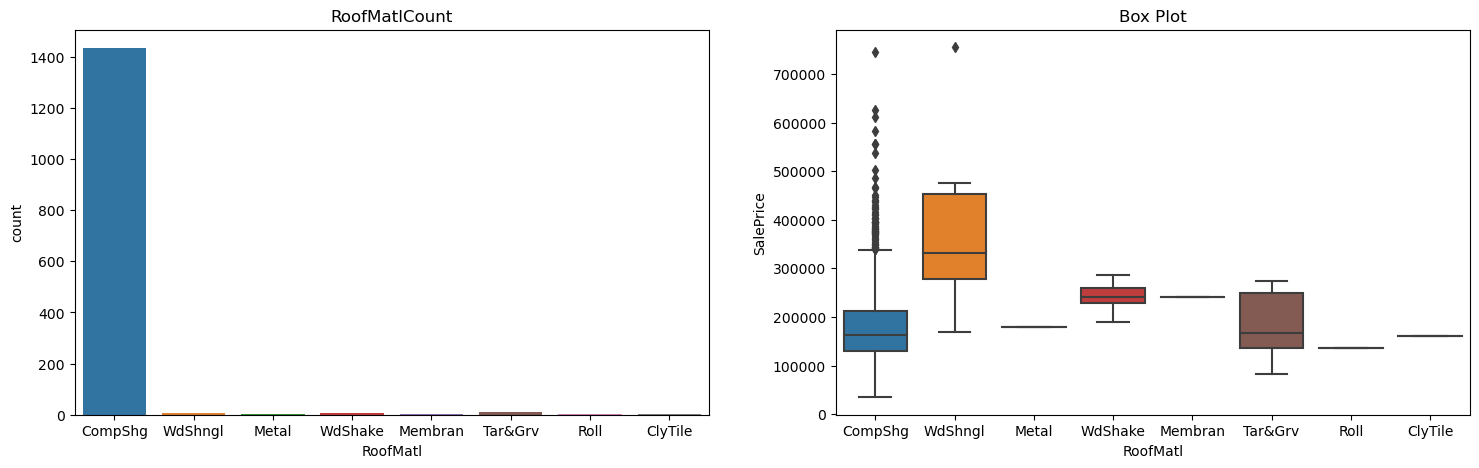

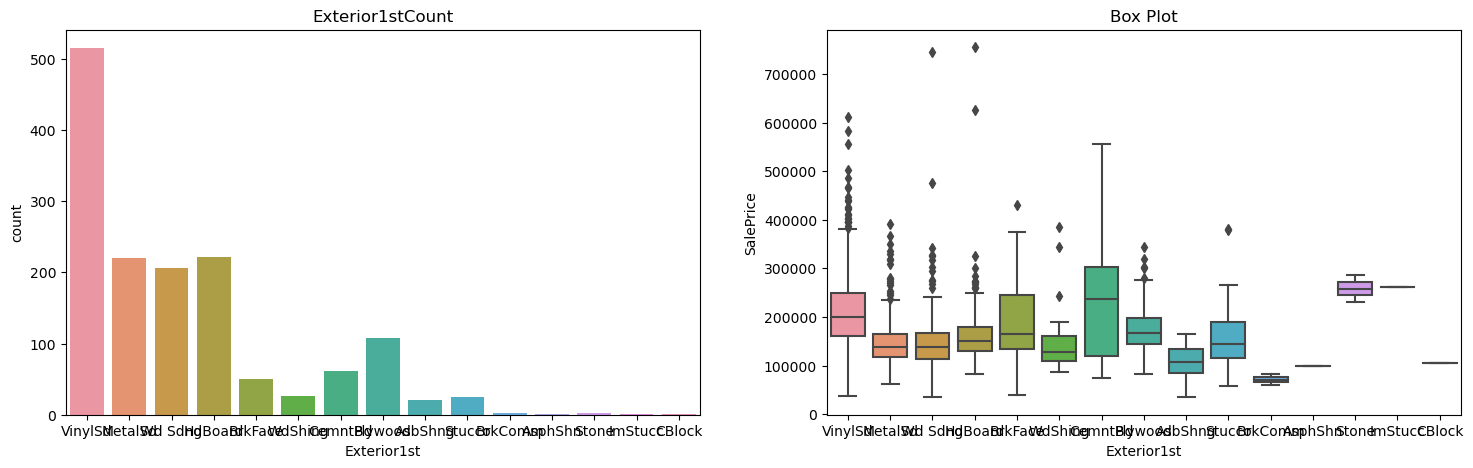

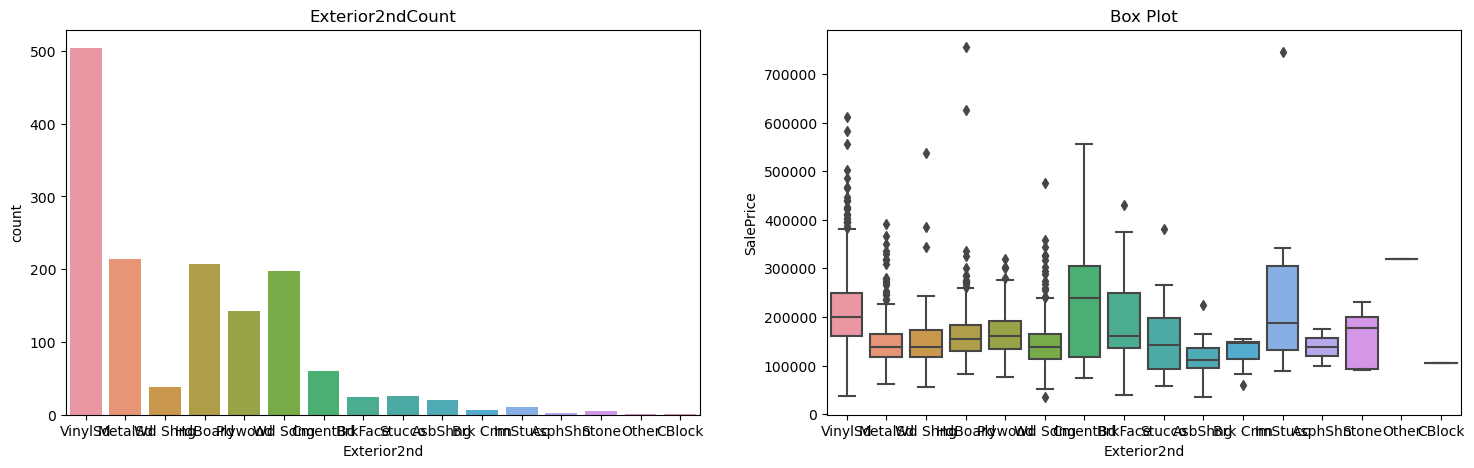

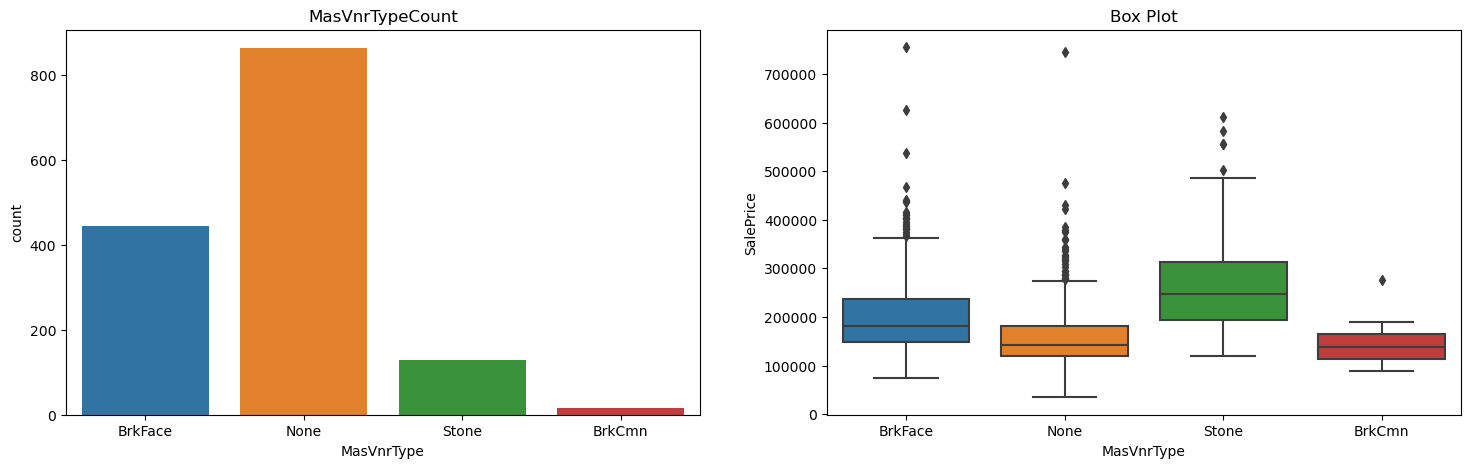

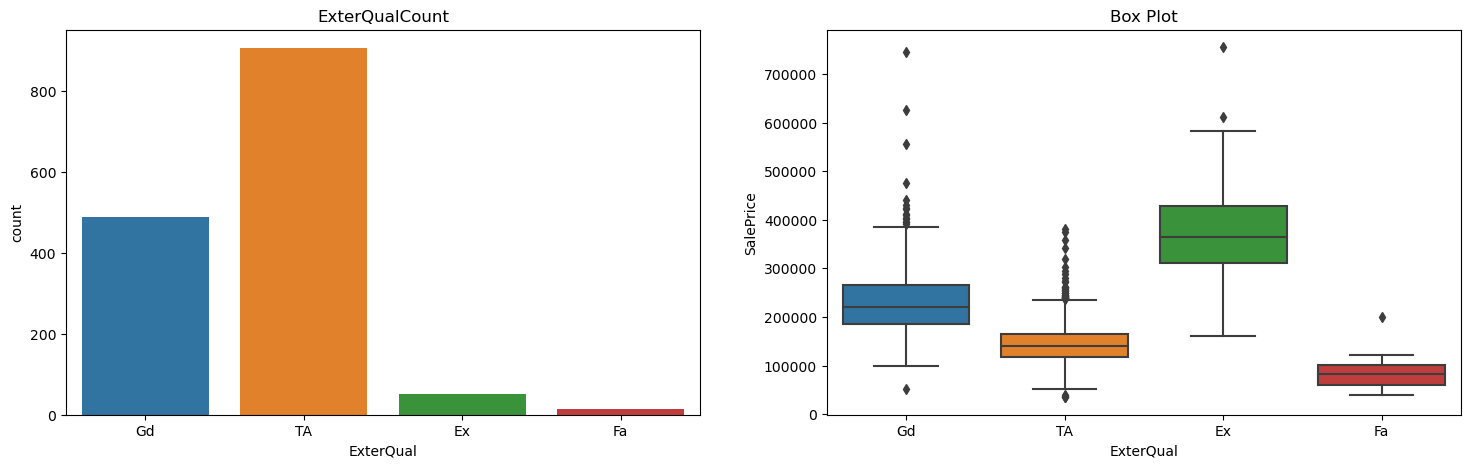

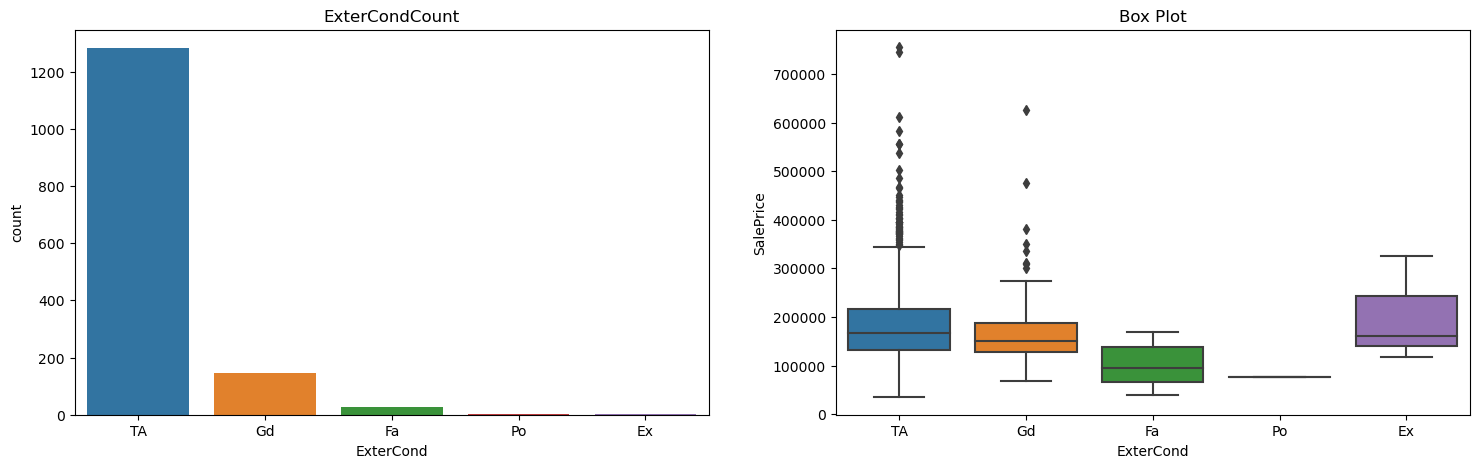

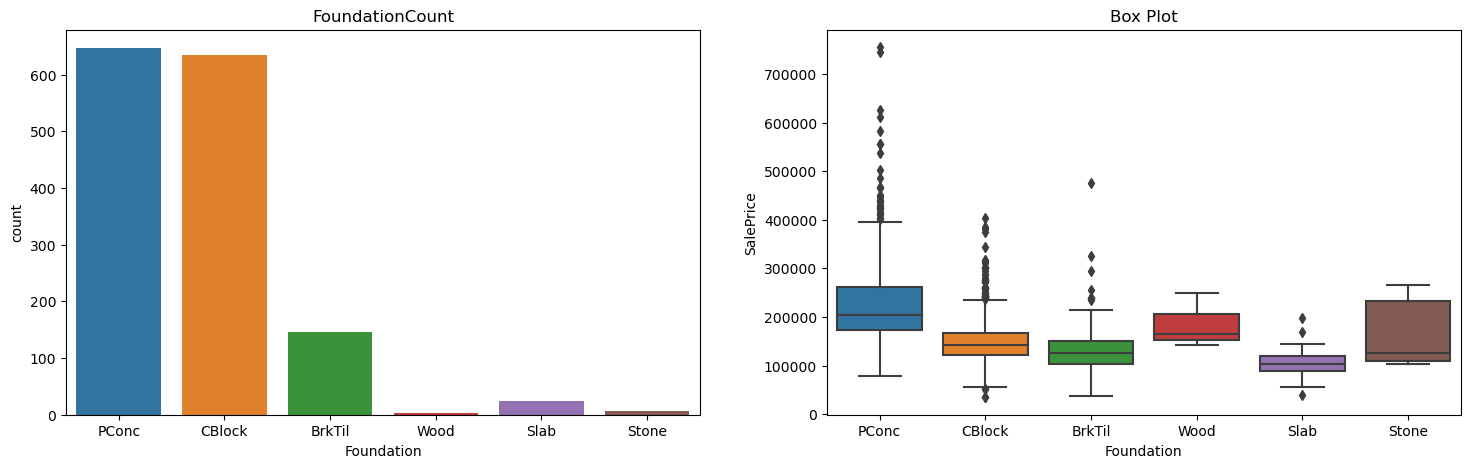

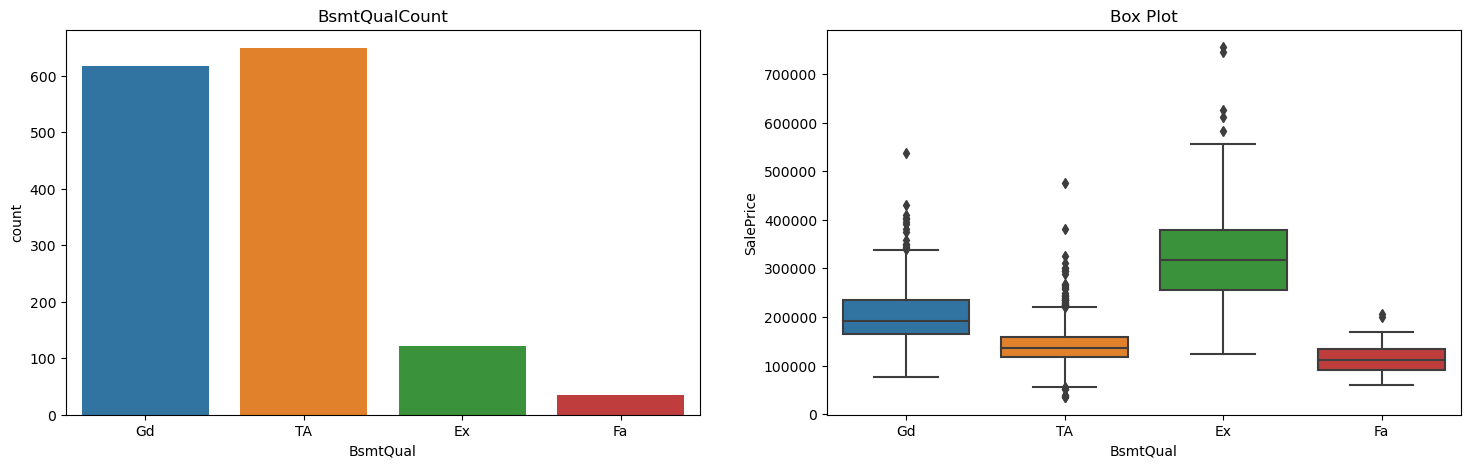

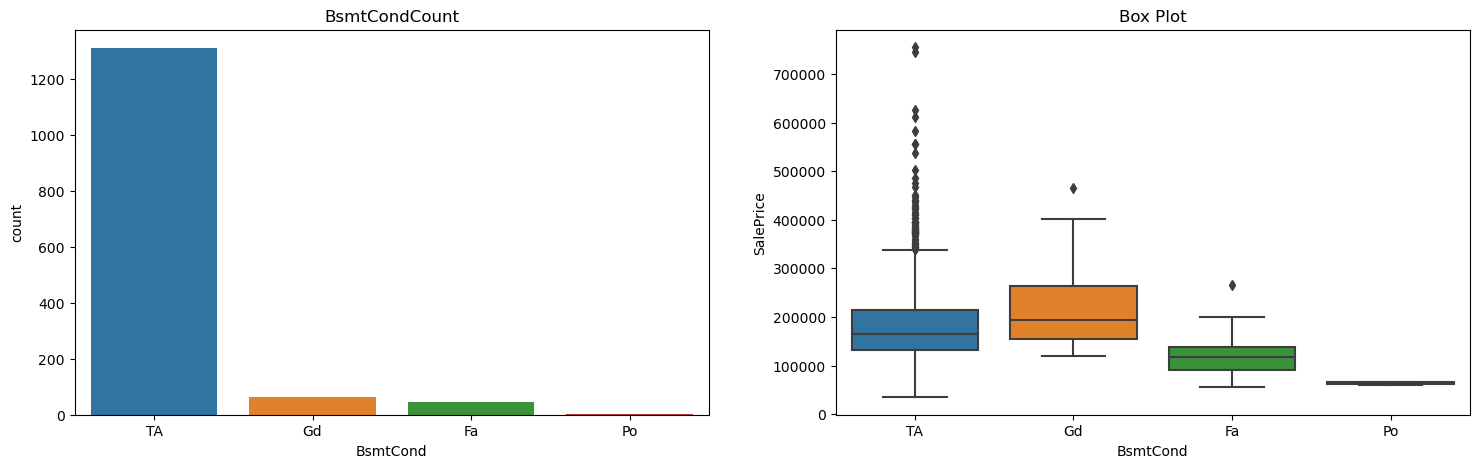

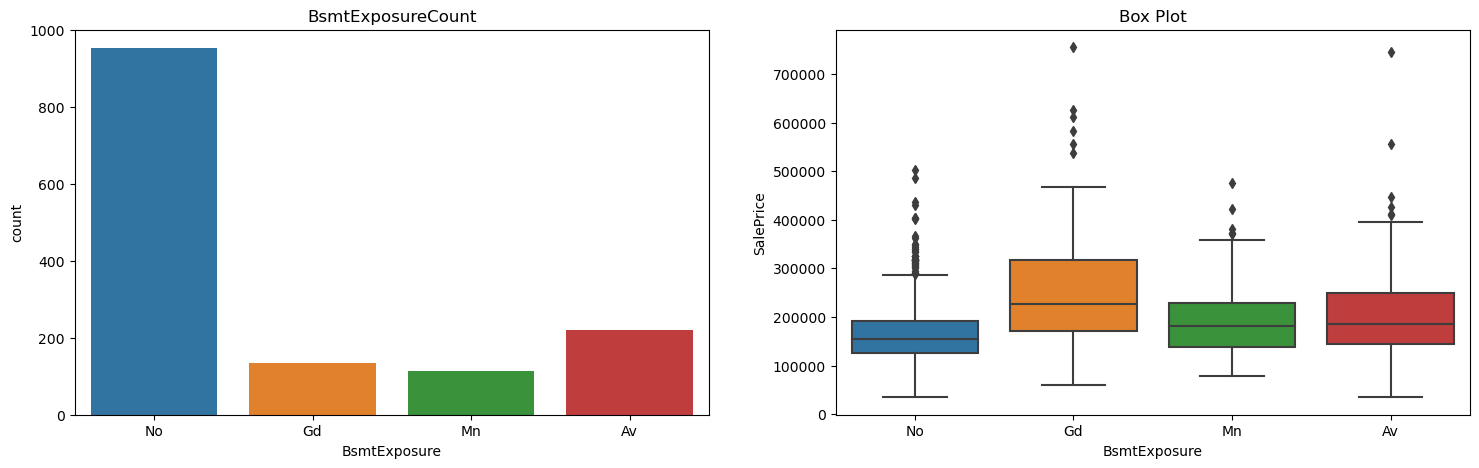

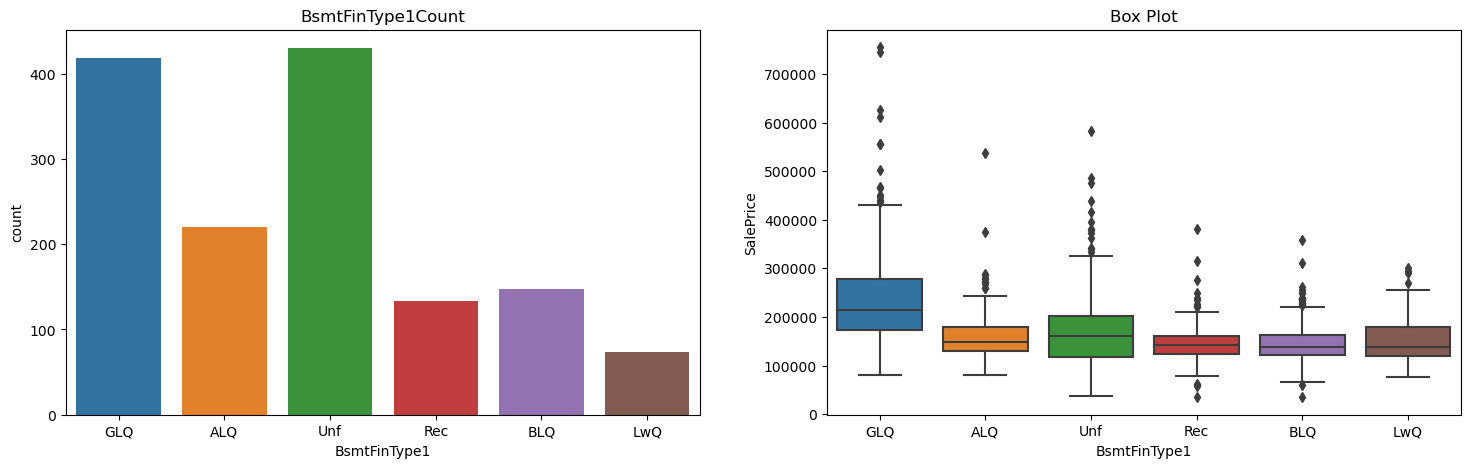

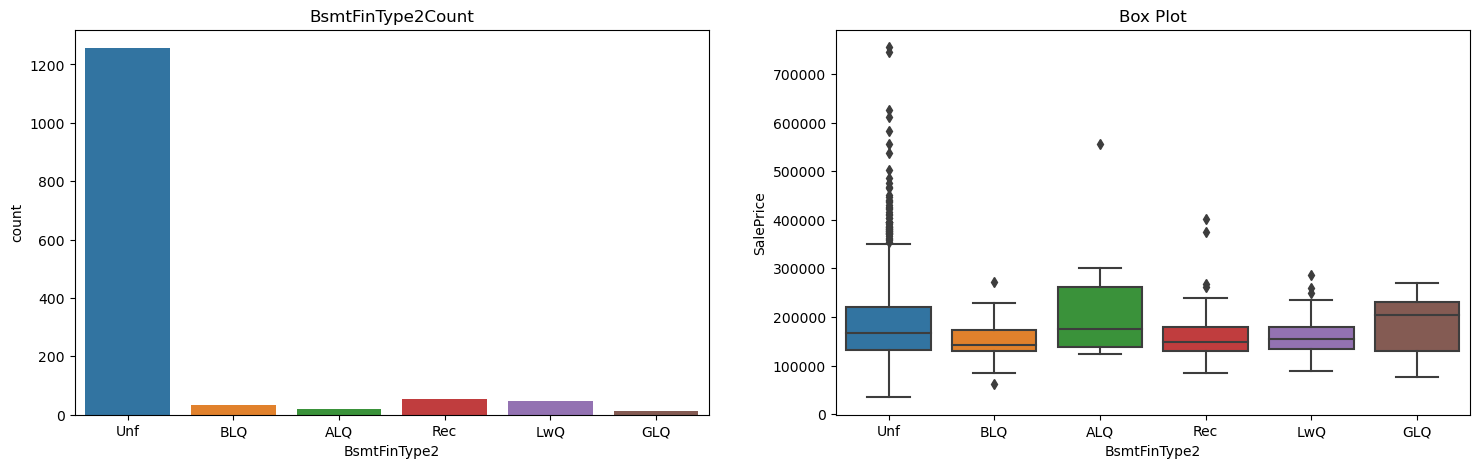

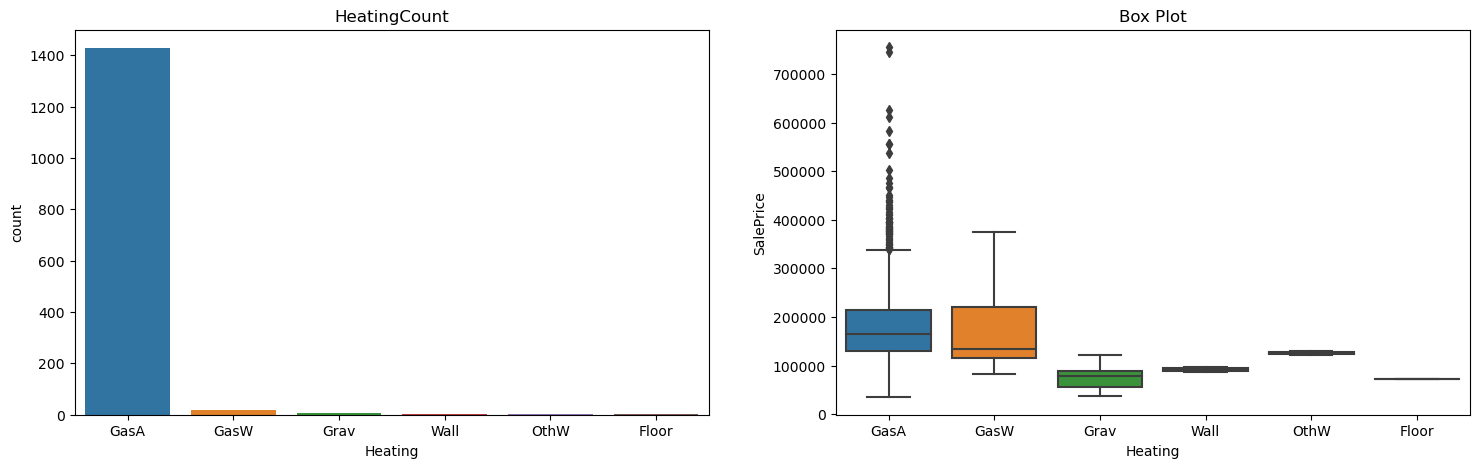

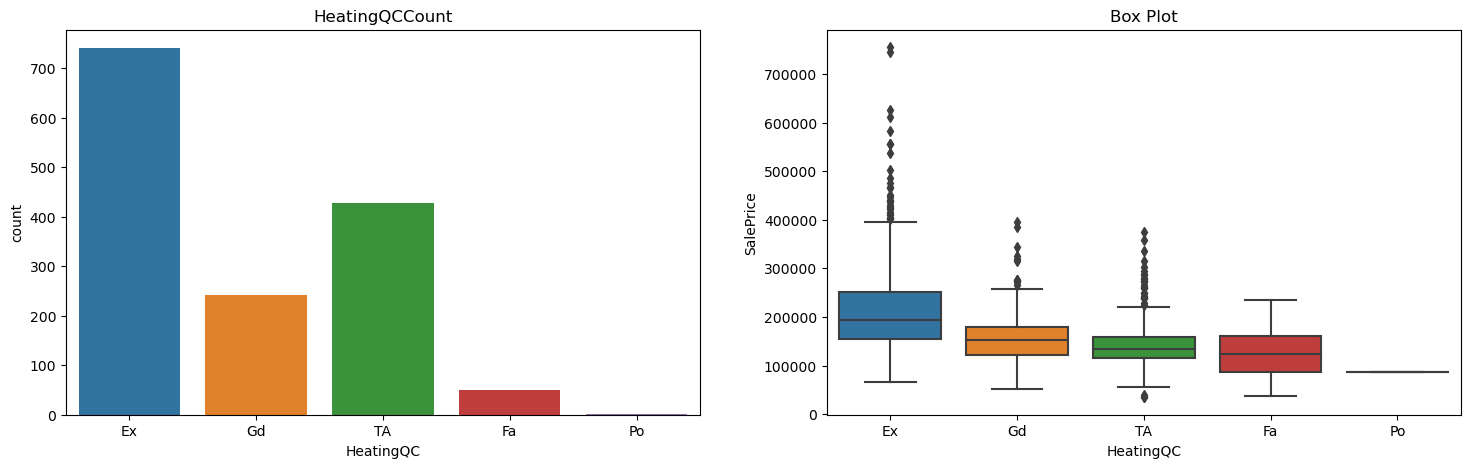

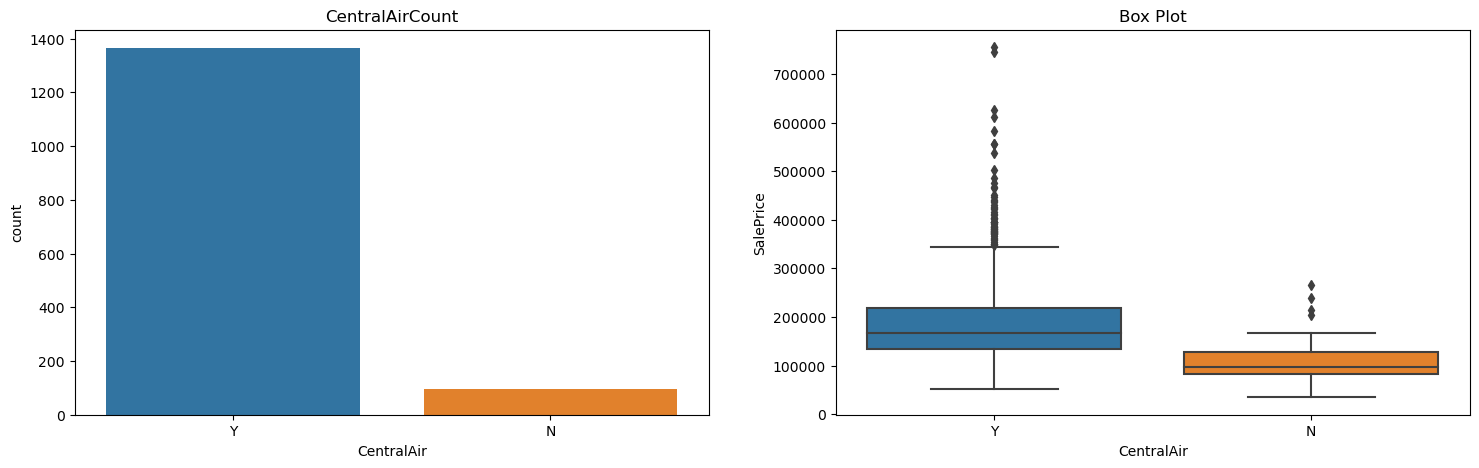

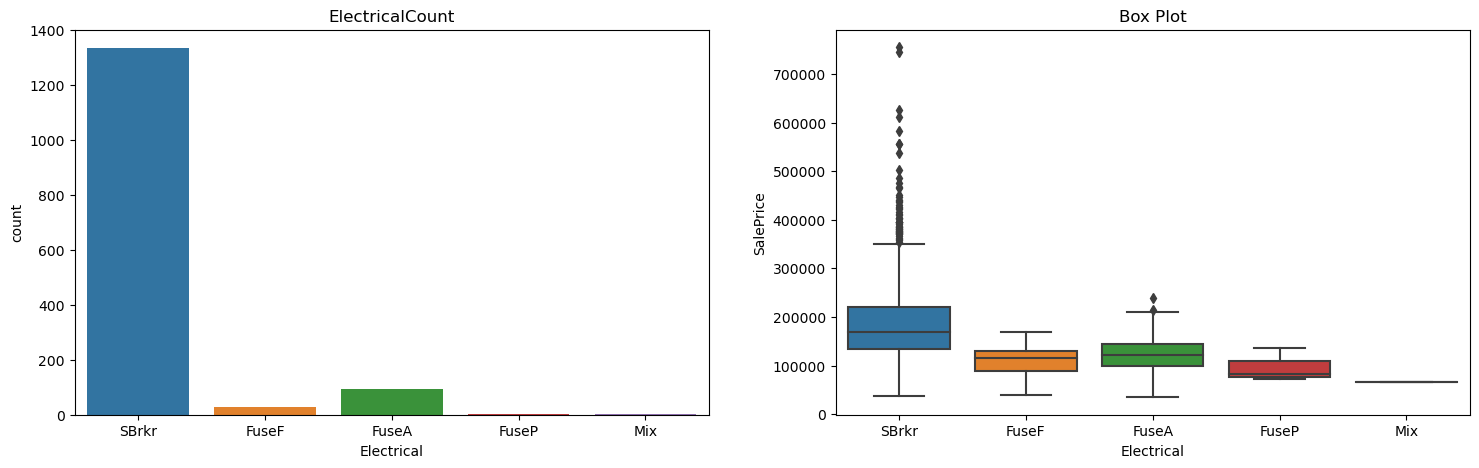

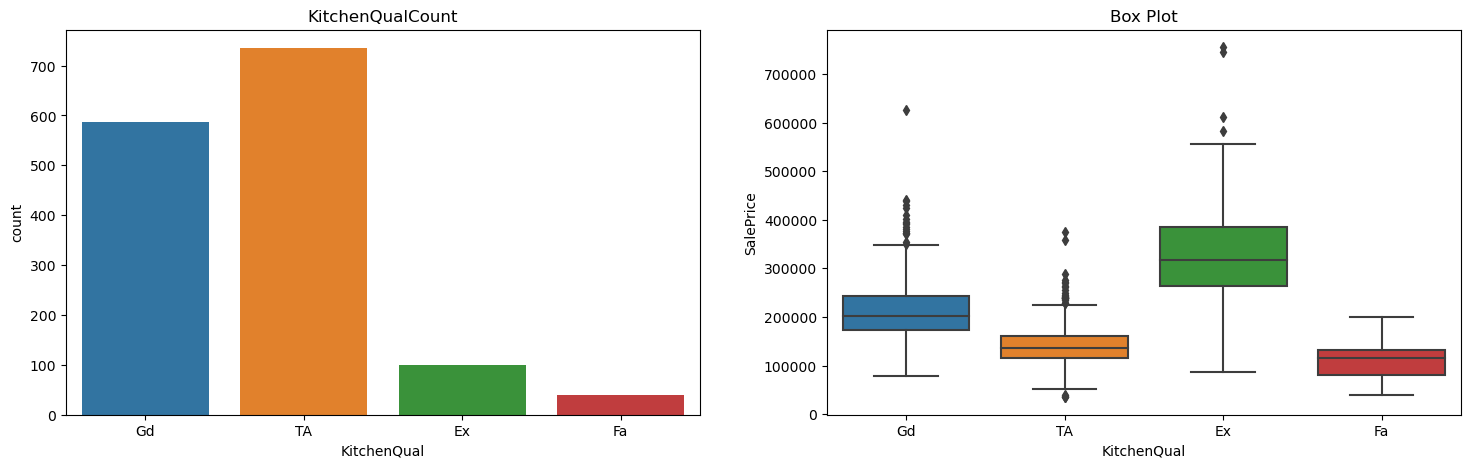

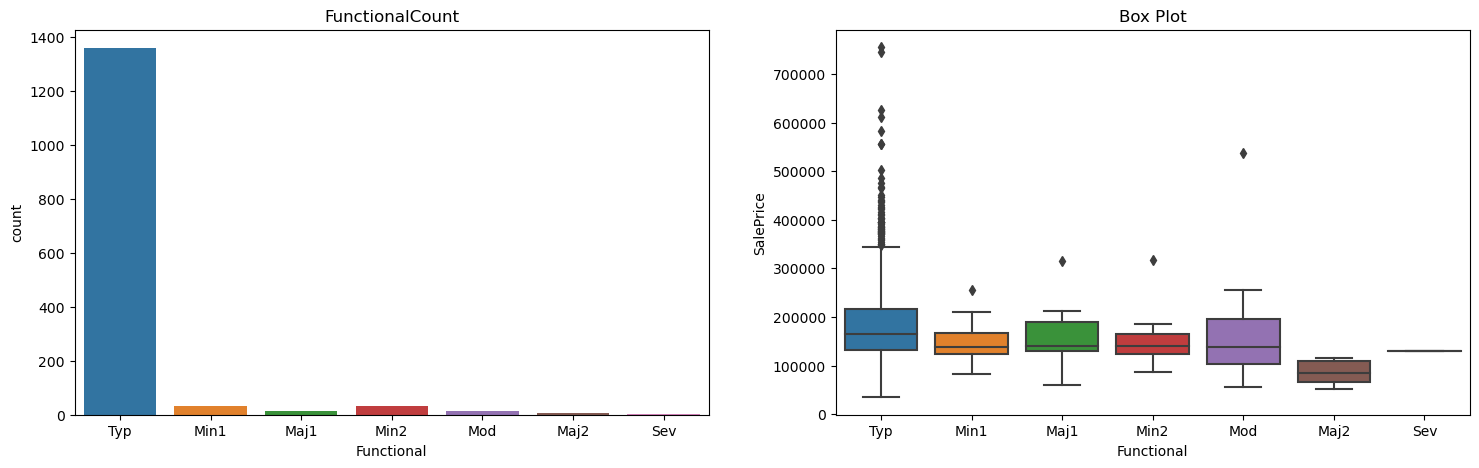

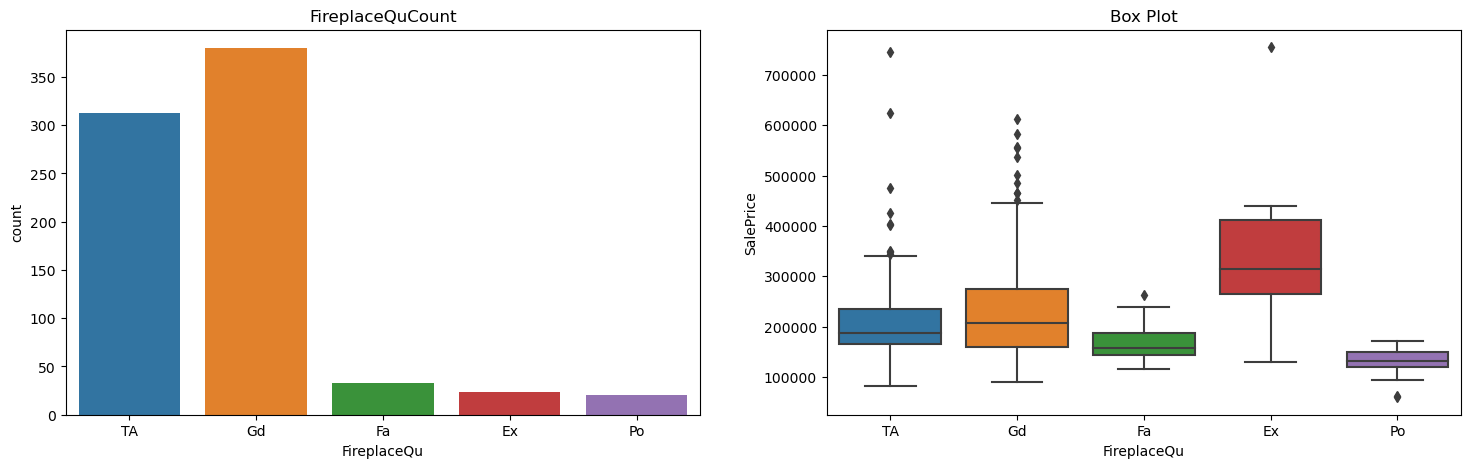

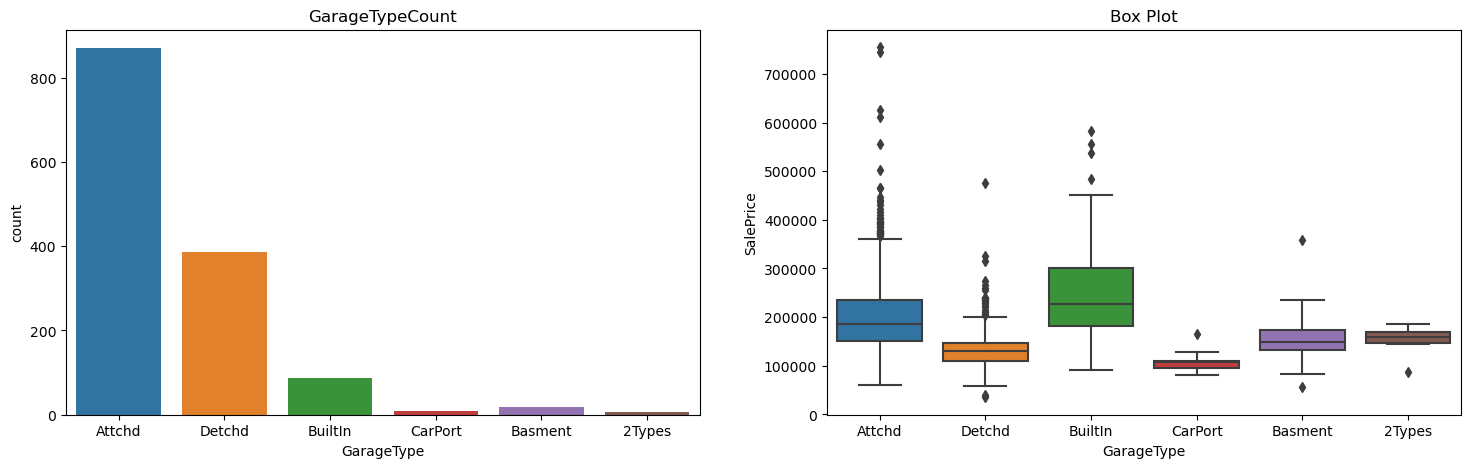

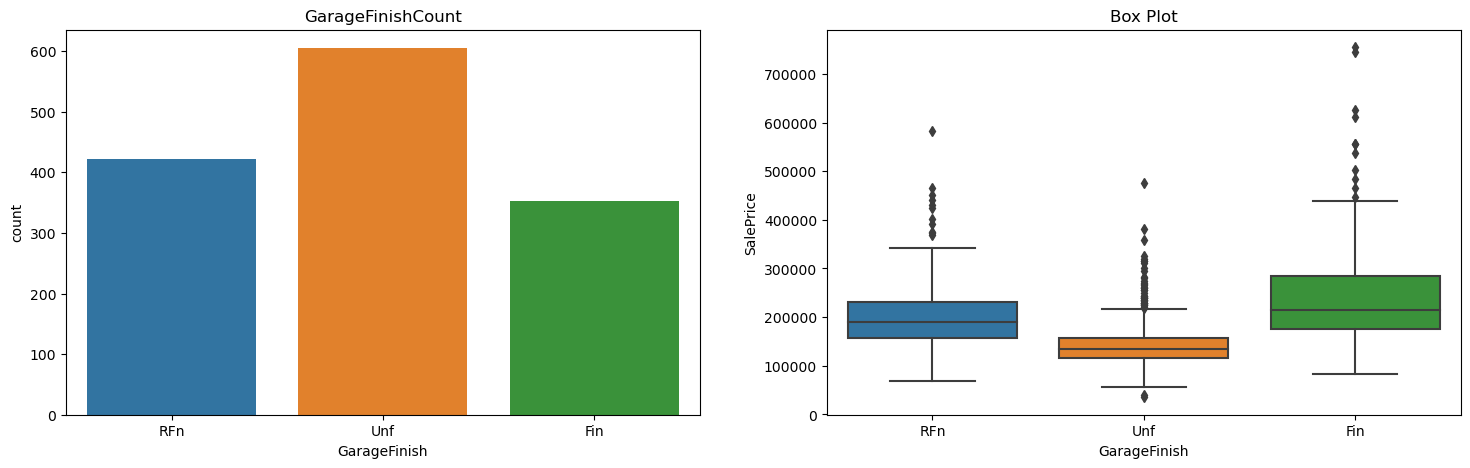

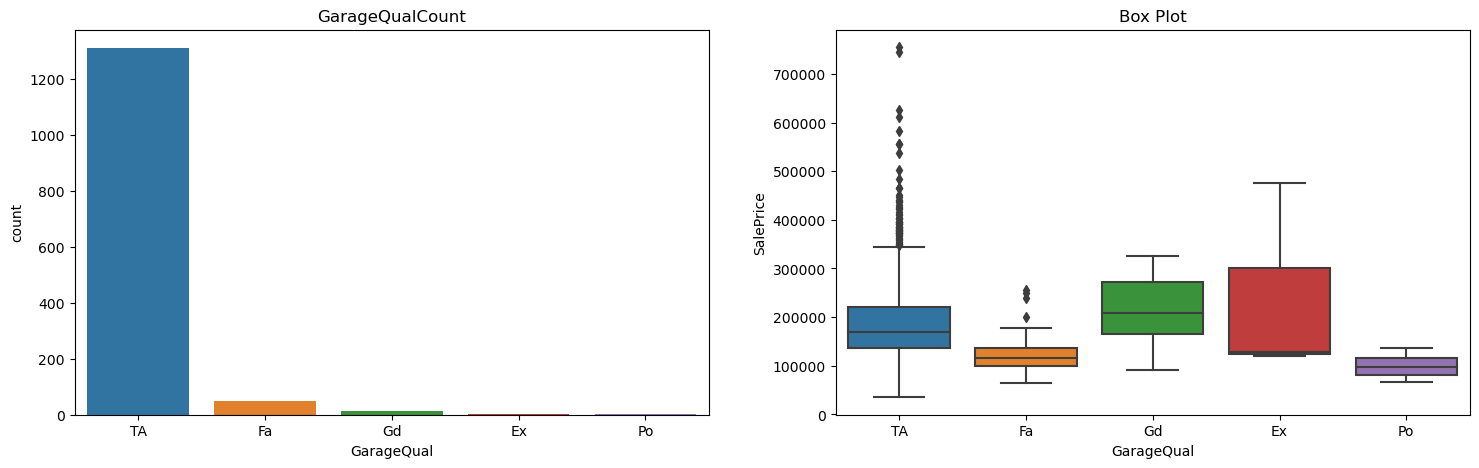

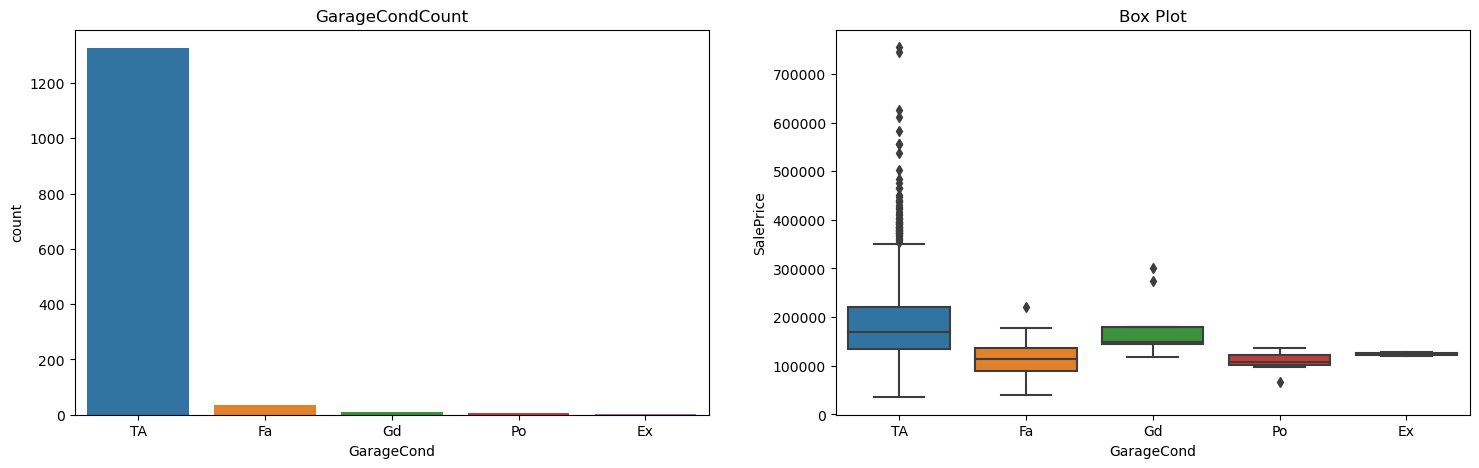

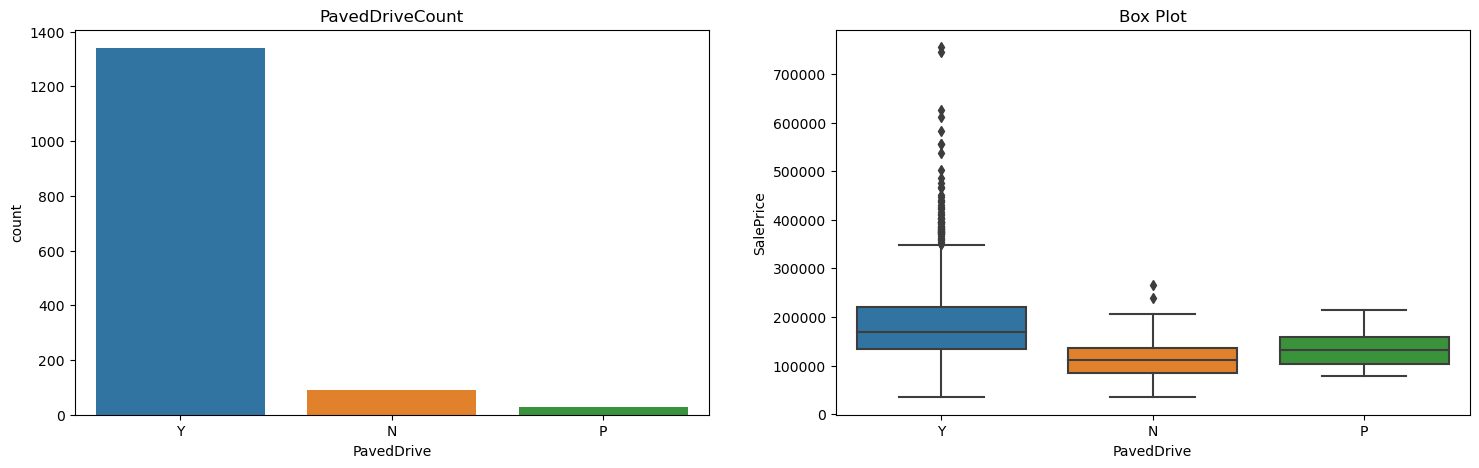

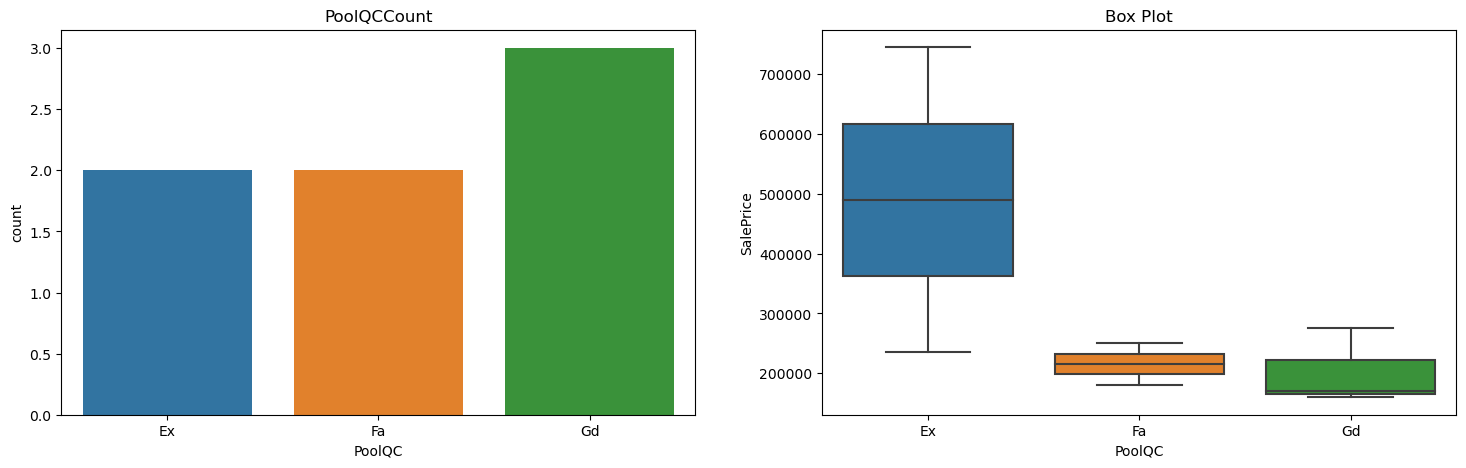

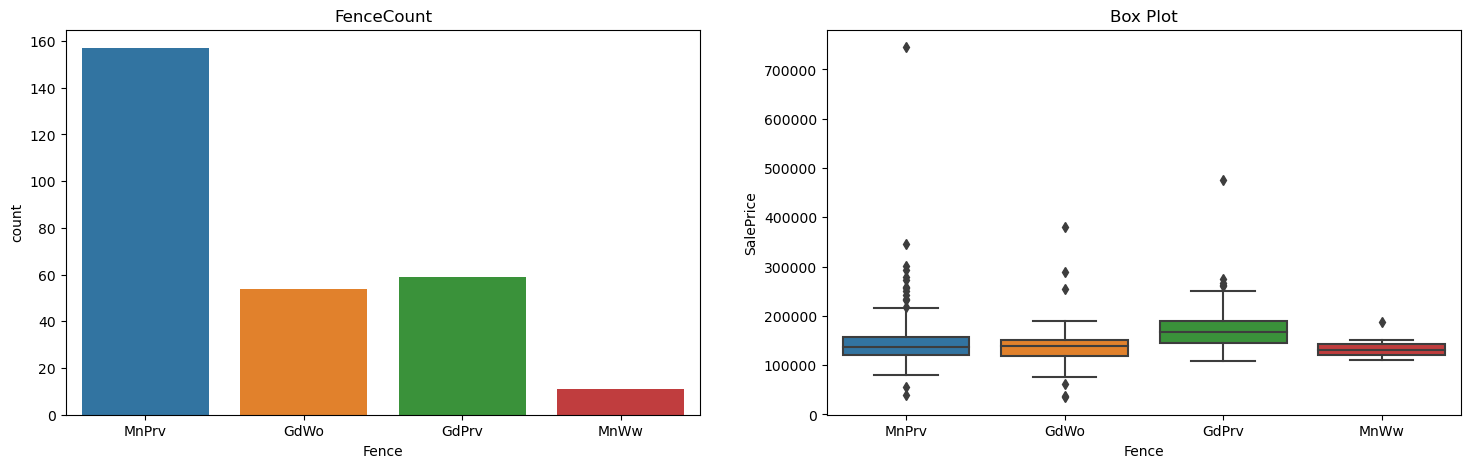

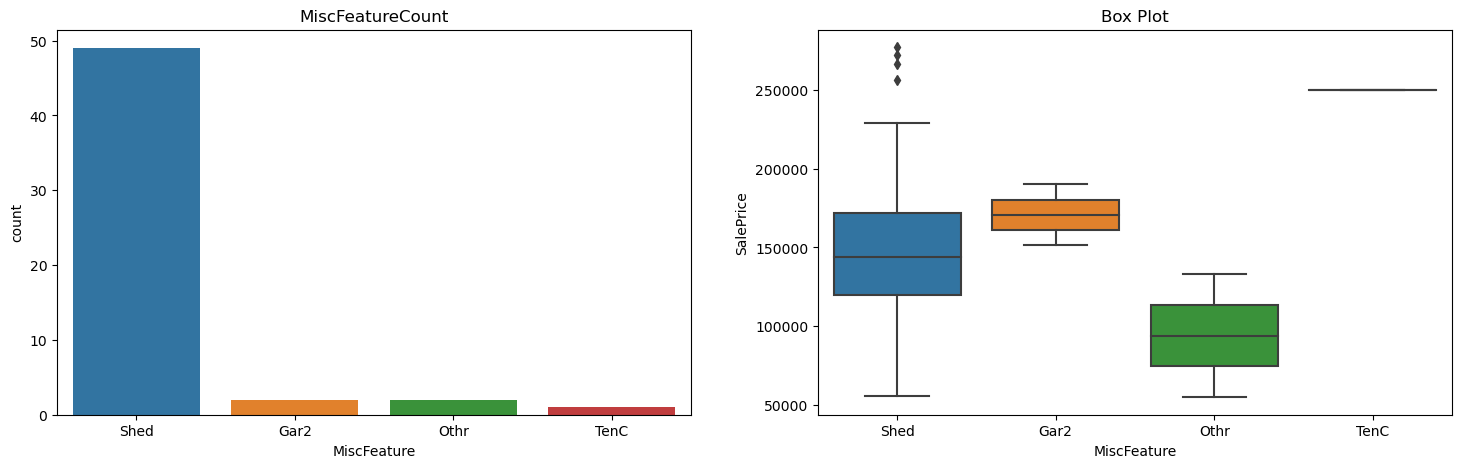

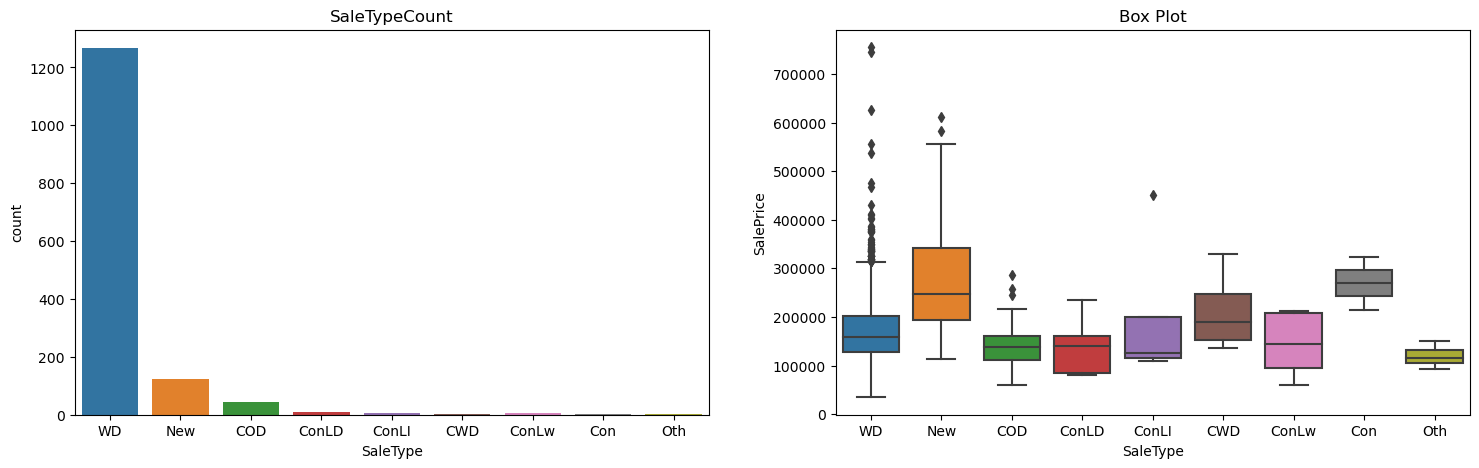

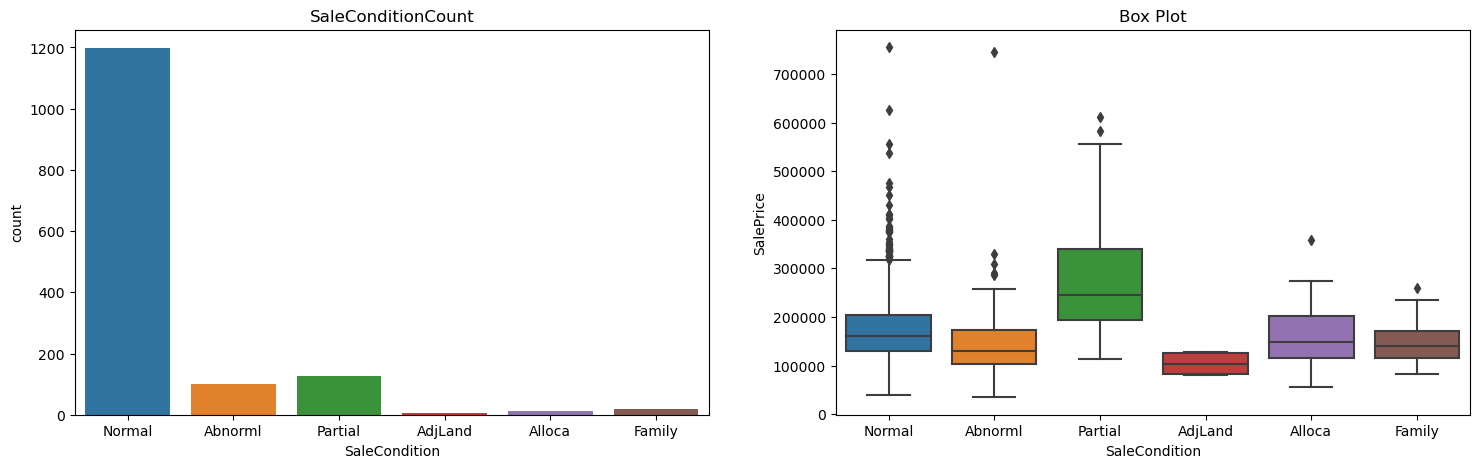

In [16]:

for i in categorical_columns:
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    sns.countplot(data=df,x=i)
    plt.title(i+'Count')

    plt.subplot(1,2,2)
    sns.boxplot(x=i,y='SalePrice',data=df)
    plt.title('Box Plot')
    

    

In [17]:
for i in categorical_columns:
    print(df[i].value_counts())
    print()
    

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Grvl    50
Pave    41
Name: Alley, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood

In [18]:
df.drop('Neighborhood',axis=1,inplace=True)

In [19]:
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)

In [20]:
le = LabelEncoder()

In [21]:
categorical_columns.remove('Neighborhood')
for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

In [22]:
# Missing Values for Numerical Data

In [23]:
print(df.isna().sum().to_string())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr 

In [24]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].min(),inplace=True)


In [25]:
print(df['GarageYrBlt'].mode()[0])
df['GarageYrBlt'].median()

1900.0


1977.0

In [26]:
df['GarageYrBlt'].describe()

count    1460.000000
mean     1974.150685
std        29.982047
min      1900.000000
25%      1958.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [27]:
print(df.isna().sum().to_string())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu 

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df, i) for i in range(df.shape[1])]
vif['Features'] = df.columns

print(vif.to_string())

             VIF       Features
0      15.017747     MSSubClass
1      29.781638       MSZoning
2      19.864527    LotFrontage
3       3.518947        LotArea
4     288.358134         Street
5      30.863444          Alley
6       3.621233       LotShape
7      21.730672    LandContour
8       1.088348      Utilities
9       5.119551      LotConfig
10      1.695737      LandSlope
11      7.278752     Condition1
12     66.414528     Condition2
13      5.355799       BldgType
14      7.922929     HouseStyle
15     83.634300    OverallQual
16     51.470684    OverallCond
17  26859.915707      YearBuilt
18  20815.662934   YearRemodAdd
19      4.860288      RoofStyle
20      5.022625       RoofMatl
21     40.616786    Exterior1st
22     38.396041    Exterior2nd
23     12.669297     MasVnrType
24      2.412885     MasVnrArea
25     39.190173      ExterQual
26     32.934506      ExterCond
27      9.157205     Foundation
28     18.127541       BsmtQual
29     22.531729       BsmtCond
30      

In [29]:
# Standard Scalar

In [30]:
X= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [31]:
sc = StandardScaler()

In [32]:
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          60         3         65.0     8450       1      2         3   
1          20         3         80.0     9600       1      2         3   
2          60         3         68.0    11250       1      2         0   
3          70         3         60.0     9550       1      2         0   
4          60         3         84.0    14260       1      2         0   

   LandContour  Utilities  LotConfig  ...  3SsnPorch  ScreenPorch  PoolArea  \
0            3          0          4  ...          0            0         0   
1            3          0          2  ...          0            0         0   
2            3          0          4  ...          0            0         0   
3            3          0          0  ...          0            0         0   
4            3          0          2  ...          0            0         0   

   PoolQC  Fence  MiscFeature  MoSold  SaleType  SaleCondition  SalePrice  
0       3      4            4       2         8              4     208500  
1       3      4            4       5         8              4     181500  
2       3      4            4       9         8              4     223500  
3       3      4            4       2         8              0     140000  
4       3      4            4      12         8              4     250000  

[5 rows x 74 columns]

In [33]:
numerical_columns.remove('SalePrice')
for i in numerical_columns:
    loc = df.columns.get_loc(i)
    print(loc,i)
    X[:,loc:loc+1]= sc.fit_transform(X[:,loc:loc+1])
    

0 MSSubClass
2 LotFrontage
3 LotArea
15 OverallQual
16 OverallCond
17 YearBuilt
18 YearRemodAdd
24 MasVnrArea
32 BsmtFinSF1
34 BsmtUnfSF
35 TotalBsmtSF
40 1stFlrSF
41 2ndFlrSF
42 GrLivArea
43 BsmtFullBath
44 FullBath
45 HalfBath
46 BedroomAbvGr
47 KitchenAbvGr
49 TotRmsAbvGrd
51 Fireplaces
54 GarageYrBlt
56 GarageCars
57 GarageArea
61 WoodDeckSF
62 OpenPorchSF
63 EnclosedPorch
64 3SsnPorch
65 ScreenPorch
66 PoolArea
70 MoSold


In [34]:
# Train Test Split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,test_size=0.3)

In [36]:
# Model

In [37]:
svr = SVR()

In [38]:
svr.fit(X_train,y_train)

SVR()

In [39]:
y_pred = svr.predict(X_test)

In [40]:
# Accuracy

In [41]:
mean_squared_error(y_test,y_pred,squared=False)

79158.82391025039

In [42]:
r2_score(y_test,y_pred)

-0.09195213681792924

# XGBOOST

In [43]:
from xgboost import XGBRFRegressor

In [44]:
xgb = XGBRFRegressor(n_estimators=100)

In [45]:
xgb.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [46]:
y_pred_xgb = xgb.predict(X_test)

In [47]:
mean_squared_error(y_test,y_pred_xgb,squared=False)

28145.14899624919

In [48]:
r2_score(y_test,y_pred_xgb)

0.8619577464895588

# Test File 

In [49]:
df_test = pd.read_csv("test.csv")

In [50]:
test_copy = pd.read_csv("test.csv")

In [51]:
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [52]:
df_test.drop("Id",axis=1,inplace=True)

In [53]:
numerical_columns_test=[]
categorical_columns_test=[]
for i in df_test.columns:
    if df_test[i].dtypes not in ['0','object']:
        numerical_columns_test.append(i)
    else:
        categorical_columns_test.append(i)

In [54]:
df_test.drop('BsmtFinSF2',axis=1,inplace=True)
df_test.drop('LowQualFinSF',axis=1,inplace=True)
df_test.drop('BsmtHalfBath',axis=1,inplace=True)
df_test.drop('YrSold',axis=1,inplace=True)
df_test.drop('MiscVal',axis=1,inplace=True)

In [55]:
for i in ['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','YrSold','MiscVal']:
    numerical_columns_test.remove(i)

In [56]:
df_test.drop('Neighborhood',axis=1,inplace=True)

df_test['Electrical'].fillna(df_test['Electrical'].mode()[0],inplace=True)
df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0],inplace=True)

In [57]:
df_test.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
                 ... 
Fence            1169
MiscFeature      1408
MoSold              0
SaleType            1
SaleCondition       0
Length: 73, dtype: int64

In [58]:
categorical_columns_test.remove('Neighborhood')
for i in categorical_columns_test:
    df_test[i] = le.fit_transform(df_test[i])

In [59]:
df_test.isna().sum().sort_values(ascending=False)

LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtFullBath       2
GarageCars         1
                ... 
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
MSZoning           0
SaleCondition      0
Length: 73, dtype: int64

In [60]:
df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean(),inplace=True)
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean(),inplace=True)
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].min(),inplace=True)


In [61]:
print(df_test['GarageYrBlt'].mode()[0])
df_test['GarageYrBlt'].median()

1895.0


1977.0

In [62]:
df_test.isna().sum().sort_values(ascending=False).head(20)

BsmtFullBath    2
TotalBsmtSF     1
BsmtUnfSF       1
GarageCars      1
BsmtFinSF1      1
GarageArea      1
MSSubClass      0
KitchenAbvGr    0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
HalfBath        0
BedroomAbvGr    0
GarageType      0
FullBath        0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
FireplaceQu     0
dtype: int64

In [63]:
df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mean(),inplace=True)
df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean(),inplace=True)
df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].min(),inplace=True)
df_test['GarageCars'].fillna(df_test['GarageCars'].mean(),inplace=True)
df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].min(),inplace=True)
df_test['GarageArea'].fillna(df_test['GarageArea'].min(),inplace=True)

In [64]:
df_test.isna().sum().max()

0

In [65]:
X_test_file= df_test.iloc[:,:].values

sc = StandardScaler()

for i in numerical_columns_test:
    loc = df_test.columns.get_loc(i)
    print(loc,i)
    X_test_file[:,loc:loc+1]= sc.fit_transform(X_test_file[:,loc:loc+1])
    

0 MSSubClass
2 LotFrontage
3 LotArea
15 OverallQual
16 OverallCond
17 YearBuilt
18 YearRemodAdd
24 MasVnrArea
32 BsmtFinSF1
34 BsmtUnfSF
35 TotalBsmtSF
40 1stFlrSF
41 2ndFlrSF
42 GrLivArea
43 BsmtFullBath
44 FullBath
45 HalfBath
46 BedroomAbvGr
47 KitchenAbvGr
49 TotRmsAbvGrd
51 Fireplaces
54 GarageYrBlt
56 GarageCars
57 GarageArea
61 WoodDeckSF
62 OpenPorchSF
63 EnclosedPorch
64 3SsnPorch
65 ScreenPorch
66 PoolArea
70 MoSold


In [66]:
y_pred_file = xgb.predict(X_test_file)

In [67]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'Scree

In [68]:
target = pd.DataFrame({'Id':test_copy.Id.values,'SalePrice':y_pred_file})

In [69]:
target.to_csv('submission.csv',index=False)